## Imports

In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Data/dreaddit-train.csv')
df_test = pd.read_csv('Data/dreaddit-test.csv')

In [3]:
wnl = WordNetLemmatizer()
def preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url', 'youi']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return " ".join(tokens)
    #return tokens

In [4]:
custom_stop_words = ['r', 'url', 'youi']
stopwords_list = stopwords.words('english') + custom_stop_words
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
list_to_proc = df['text'].tolist()
text_list = []

for each_row in list_to_proc:
    text_list.append(preprocessing(each_row))

In [6]:
test_list_to_proc = df_test['text'].tolist()
test_text_list = []

for each_row in test_list_to_proc:
    test_text_list.append(preprocessing(each_row))

In [7]:
#save train text as a list to be preprocessed
text = [doc for doc in df['text']]

In [8]:
#save test text as a list to be preprocessed
test_text = [doc for doc in df_test['text']]

## Preprocess Data

In [9]:
#preprocessed train data
processed_text = [preprocessing(doc) for doc in text]

In [10]:
#preprocessed test data
test_processed_text = [preprocessing(doc) for doc in test_text]

In [11]:
processed_text

["said felt way suggeted go rest trigger ahead hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloom f'n worried heart happen physical hour",
 "hey assistance sure right place post go i'm currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country we're looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc",
 'mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided take friend go help another friend move new place driving friend moving strike shoulder address immediately th time 

In [12]:
#add processed text as a column 
df['processed_text'] = processed_text

In [13]:
#add processed text as a column 
df_test['processed_text'] = test_processed_text

## CountVectorizer

In [14]:
#countVectorizer- fit only on train data
count_vector = CountVectorizer()
count_vector.fit(df['processed_text'])

CountVectorizer()

In [15]:
#transform xtrain
X_train = count_vector.transform(df['processed_text'])

In [16]:
X_train = X_train.toarray()

In [17]:
#transform xtest
X_test = count_vector.transform(df_test['processed_text'])

In [18]:

X_test = X_test.toarray()

In [19]:
y_train = df['label']
y_test = df_test['label']

## Multinomial NB Model

In [20]:
#instantiate model and fit on train data
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[191, 155],
       [ 61, 308]])

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

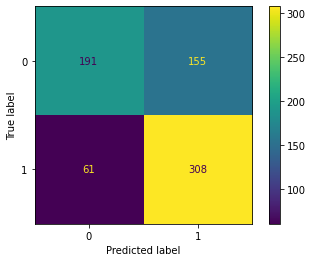

In [25]:
disp.plot()

plt.show()

In [26]:
#misclassified ypredicted
count_misclassified = (y_test != y_pred).sum()

In [27]:
count_misclassified

216

In [28]:
#training data score
clf.score(X_train, y_train)

0.9147286821705426

In [29]:
#test data score
clf.score(X_test, y_test)

0.6979020979020979

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64       346
           1       0.67      0.83      0.74       369

    accuracy                           0.70       715
   macro avg       0.71      0.69      0.69       715
weighted avg       0.71      0.70      0.69       715



In [31]:
clf.coef_

array([[-10.441033  , -10.03556789, -11.13418018, ..., -10.441033  ,
        -11.13418018, -10.441033  ]])

In [32]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(clf, X_train, y_train, cv=5, scoring=mse)

In [33]:
cv_5_results

array([0.27816901, 0.25880282, 0.27816901, 0.2627866 , 0.2292769 ])

In [34]:
cv_results = cross_val_score(clf, X_train, y_train, cv=5)

In [35]:
cv_results

array([0.72183099, 0.74119718, 0.72183099, 0.7372134 , 0.7707231 ])

In [36]:
cv_test_results = cross_val_score(clf, X_test, y_test, cv=5)

In [37]:
cv_test_results

array([0.67832168, 0.68531469, 0.69230769, 0.6993007 , 0.65034965])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer


print("Vocabulary : ",count_vector.vocabulary_)

Vocabulary :  {'said': 7527, 'felt': 3275, 'way': 9575, 'suggeted': 8492, 'go': 3756, 'rest': 7311, 'trigger': 9038, 'ahead': 226, 'hypocondriac': 4286, 'like': 5057, 'decide': 2152, 'look': 5146, 'feeling': 3268, 'doom': 2580, 'hope': 4176, 'maybe': 5335, 'getting': 3709, 'sucked': 8469, 'rabbit': 6881, 'hole': 4135, 'ludicrous': 5195, 'conspiracy': 1776, 'stupid': 8429, 'psychic': 6772, 'test': 8743, 'new': 5755, 'age': 198, 'something': 8077, 'could': 1899, 'even': 3016, 'laugh': 4947, 'road': 7421, 'ended': 2879, 'reading': 6977, 'sense': 7706, 'indicative': 4445, 'various': 9377, 'health': 4025, 'ailment': 229, 'one': 5948, 'prone': 6724, 'top': 8924, 'gloom': 3749, 'worried': 9778, 'heart': 4036, 'happen': 3964, 'physical': 6351, 'hour': 4219, 'hey': 4088, 'assistance': 536, 'sure': 8539, 'right': 7395, 'place': 6394, 'post': 6513, 'currently': 2055, 'student': 8414, 'intern': 4607, 'sandia': 7541, 'national': 5682, 'lab': 4893, 'working': 9771, 'survey': 8555, 'help': 4066, 'imp

In [39]:
print("features : ",count_vector.get_feature_names())

features :  ['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abortion', 'abound', 'abrasive', 'abridged', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolve', 'absorbed', 'absorbing', 'abstinence', 'abstract', 'absurd', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abut', 'abyss', 'ac', 'academic', 'academy', 'acap', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessory', 'accident', 'accidental', 'accidentally', 'accidentalsuicide', 'acclamation', 'accommodate', 'accommodation', 'accomodation', 'accompanied', 'accomplish', 'accomplishing', 'accomplishment', 'according', 'account', 'accountable', 'accurate', 'accurately', 'accusation', 'accusatory', 'accuse', 'accused', 'accuses', 'accusing', 'ace', 'achalasia', 'ache', 'achieve', 'achievement', 'achilles', 'acid', 'acidentaly', 'acknowledge', 'acknowledged', 'acknowledges

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression(random_state=0)

In [42]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
predictions = logreg.predict(X_test)

In [44]:
#training score
logreg.score(X_train, y_train)

0.9950669485553206

In [45]:
#test score
logreg.score(X_test, y_test)

0.7048951048951049

In [46]:
count_misclassified = (y_test != predictions).sum()

In [47]:
count_misclassified

211

## Topic Model

In [48]:
from sklearn.decomposition import NMF

In [49]:
topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [50]:
W = topic_model.fit_transform(X_train)
H = topic_model.components_

In [51]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([count_vector.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['aa', 'abandonment', 'abandon', 'abhorrent', 'abandoned', 'ability', 'abandoning', 'abb', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1
['aa', 'aaand', 'abandonment', 'ability', 'abd', 'abhorrent', 'abandon', 'abandoning', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #2
['abb', 'abd', 'ability', 'abhorrent', 'abandonment', 'abandoned', 'aaand', 'abandoning', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #3
['abandon', 'abandoned', 'abb', 'ability', 'abd', 'aa', 'abandoning', 'abandonment', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #4
['abandon', 'abhorrent', 'ability', 'abandoned', 'abandonment', 'abb', 'abandoning', 'abd', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #5
['aaand', 'abandon', 'abandoned', 'abb', 'ability', 'abandonment', 'abd', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #6
['aaand', 'abandon', 'ability', 'abandoning', 'abb', 'abandoned', 'aa', 'abhorrent', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC 

['aaand', 'abandoning', 'abandonment', 'ability', 'abandoned', 'abandon', 'abhorrent', 'abb', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #62
['aa', 'abandoned', 'abd', 'abhorrent', 'abb', 'ability', 'abandon', 'abandonment', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #63
['aaand', 'abandonment', 'abb', 'abhorrent', 'abandoning', 'abandoned', 'abandon', 'abd', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #64
['aa', 'abandonment', 'aaand', 'abd', 'abandoned', 'abb', 'abhorrent', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #65
['aa', 'abandoned', 'abandonment', 'abhorrent', 'ability', 'aaand', 'abandoning', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #66
['aa', 'aaand', 'abandoned', 'abandonment', 'abhorrent', 'abb', 'abandon', 'abd', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #67
['aa', 'abandoned', 'abb', 'abhorrent', 'abandonment', 'ability', 'abandoning', 'abandon', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #68
['aaand', 'abandon',

['aaand', 'abandoned', 'abb', 'abd', 'abhorrent', 'abandonment', 'aa', 'ability', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #125
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #126
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'ability', 'aa', 'abhorrent', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #127
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abandoning', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #128
['abandoned', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'aaand', 'abd', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #129
['abandon', 'abandoning', 'abb', 'abandoned', 'abandonment', 'ability', 'aa', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #130
['abandoning', 'abandonment', 'abandoned', 'aa', 'abb', 'abhorrent', 'abd', 'abandon', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #131
['abandoned',

['abandon', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'aa', 'abb', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #188
['aa', 'aaand', 'abandoning', 'abb', 'abhorrent', 'abandon', 'ability', 'abd', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #189
['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'aa', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #190
['abandon', 'abandoning', 'abhorrent', 'ability', 'abb', 'abandoned', 'aa', 'aaand', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #191
['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandon', 'abandonment', 'abd', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #192
['aa', 'aaand', 'abandoned', 'abb', 'ability', 'abd', 'abandoning', 'abandon', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #193
['aaand', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'ability', 'abd', 'abb', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #194
['aa', 'aband

['abandoned', 'abandoning', 'abb', 'ability', 'abd', 'aaand', 'aa', 'abandonment', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #252
['abandon', 'abandoning', 'abb', 'ability', 'aaand', 'abandoned', 'abandonment', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #253
['aa', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'ability', 'aaand', 'abd', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #254
['aa', 'aaand', 'abandoned', 'abb', 'ability', 'abandonment', 'abhorrent', 'abandon', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #255
['aa', 'aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'abandoned', 'abd', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #256
['aa', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'abandoning', 'abb', 'ability', 'abd', 'aaand']


THE TOP 10 WORDS FOR TOPIC #257
['aa', 'aaand', 'abandoned', 'abhorrent', 'abd', 'abb', 'ability', 'abandonment', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #258
['abandoned',

['aaand', 'abhorrent', 'ability', 'abandoned', 'abb', 'abandoning', 'abandon', 'aa', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #314
['aa', 'abandonment', 'abd', 'abhorrent', 'aaand', 'abandoning', 'abandoned', 'abandon', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #315
['aaand', 'abandon', 'abandoning', 'abhorrent', 'abandonment', 'abandoned', 'aa', 'abb', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #316
['aa', 'aaand', 'abandoned', 'abhorrent', 'ability', 'abandon', 'abandoning', 'abd', 'abb', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #317
['aa', 'abandonment', 'abhorrent', 'abb', 'aaand', 'abandoned', 'abandoning', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #318
['abandon', 'abandonment', 'aaand', 'aa', 'abhorrent', 'abb', 'abd', 'abandoning', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #319
['abandoning', 'abhorrent', 'abandonment', 'abandoned', 'ability', 'abb', 'abd', 'aa', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #320
['abandonment

['abb', 'abhorrent', 'abandon', 'abandonment', 'abd', 'ability', 'aa', 'aaand', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #377
['abd', 'aaand', 'abandonment', 'abandoning', 'abhorrent', 'abandon', 'abandoned', 'abb', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #378
['abandon', 'abandoned', 'abandoning', 'abb', 'abd', 'abhorrent', 'aa', 'abandonment', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #379
['abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abd', 'aaand', 'aa', 'ability']


THE TOP 10 WORDS FOR TOPIC #380
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #381
['aa', 'abandon', 'abandoned', 'abandoning', 'abhorrent', 'abb', 'abandonment', 'abd', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #382
['abandon', 'abandoning', 'abd', 'abb', 'abandoned', 'abhorrent', 'ability', 'aaand', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #383
['aa', 'aband

['aa', 'aaand', 'abandoned', 'abandoning', 'abhorrent', 'abandon', 'abb', 'ability', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #440
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #441
['aa', 'abd', 'abb', 'abandon', 'abandoning', 'abhorrent', 'abandoned', 'ability', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #442
['aa', 'abandon', 'abandoned', 'abandonment', 'abhorrent', 'abandoning', 'abd', 'abb', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #443
['abb', 'abandonment', 'abhorrent', 'abandoning', 'abandoned', 'ability', 'abd', 'aa', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #444
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'aaand', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #445
['ability', 'abandoned', 'aa', 'abd', 'abb', 'abandonment', 'abandoning', 'aaand', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #446
['aa', 'aaand

['abandonment', 'aa', 'abb', 'abandoned', 'abhorrent', 'abandoning', 'abd', 'aaand', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #503
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'abandoned', 'aa', 'abhorrent', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #504
['aa', 'abd', 'aaand', 'ability', 'abhorrent', 'abandoning', 'abandoned', 'abb', 'abandon', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #505
['aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'abandoning', 'aa', 'abhorrent', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #506
['abandon', 'abhorrent', 'abandonment', 'aa', 'abandoned', 'abd', 'abb', 'ability', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #507
['aa', 'abandoned', 'abandonment', 'abb', 'abd', 'abandon', 'aaand', 'ability', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #508
['abandoned', 'abandoning', 'aa', 'abandonment', 'abandon', 'abd', 'abhorrent', 'aaand', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #509
['aaand', 'ab

['aaand', 'abandoned', 'abhorrent', 'abandoning', 'ability', 'abb', 'abandon', 'aa', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #566
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'ability', 'abhorrent', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #567
['abandonment', 'aa', 'abb', 'abhorrent', 'abd', 'abandoned', 'abandoning', 'aaand', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #568
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abandon', 'aaand', 'abd', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #569
['aa', 'aaand', 'abandon', 'abb', 'abandoned', 'abhorrent', 'abandoning', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #570
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #571
['abandon', 'abhorrent', 'ability', 'abandoned', 'abb', 'aa', 'abandonment', 'abd', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #572
['abandon', '

['aa', 'abandon', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'abandoned', 'aaand', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #627
['aa', 'abandoned', 'abb', 'ability', 'aaand', 'abandonment', 'abandoning', 'abd', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #628
['abandoning', 'abb', 'abhorrent', 'abandonment', 'abd', 'abandon', 'abandoned', 'ability', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #629
['aaand', 'abandon', 'ability', 'abb', 'abandonment', 'abandoned', 'aa', 'abd', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #630
['abhorrent', 'aaand', 'abb', 'abandonment', 'abandoning', 'aa', 'abandoned', 'abd', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #631
['abandoning', 'abhorrent', 'abandoned', 'abandon', 'aa', 'aaand', 'abb', 'abd', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #632
['abandoned', 'abandoning', 'abandonment', 'ability', 'aaand', 'abandon', 'abb', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #633
['aa', 'aband

['aa', 'abandonment', 'abd', 'abandoned', 'abandon', 'abhorrent', 'ability', 'abandoning', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #688
['abandon', 'abandonment', 'abandoning', 'aa', 'abhorrent', 'ability', 'abd', 'abb', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #689
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'aaand', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #690
['abandonment', 'abb', 'abhorrent', 'abandoning', 'ability', 'abandoned', 'abd', 'aaand', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #691
['aaand', 'abandon', 'abandoning', 'abhorrent', 'ability', 'abb', 'aa', 'abd', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #692
['aaand', 'abhorrent', 'abb', 'abandonment', 'abandon', 'abandoning', 'aa', 'ability', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #693
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #694
['aa', 'aband

['abb', 'abandon', 'abandoned', 'abhorrent', 'abandoning', 'aa', 'abandonment', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #753
['abandoned', 'abandonment', 'abandon', 'ability', 'aa', 'abandoning', 'abb', 'abd', 'aaand', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #754
['abandoning', 'abandonment', 'abhorrent', 'abandoned', 'abandon', 'abd', 'ability', 'aa', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #755
['abandon', 'abandoned', 'abandoning', 'abb', 'ability', 'aaand', 'abhorrent', 'aa', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #756
['aaand', 'abandoned', 'abandoning', 'abandonment', 'abhorrent', 'abd', 'abb', 'aa', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #757
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'abb', 'abhorrent', 'aaand', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #758
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'ability', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #759
['aa', 'aband

['aa', 'abandonment', 'abb', 'ability', 'abandoned', 'abandon', 'abandoning', 'abd', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #814
['aa', 'aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #815
['abandoning', 'abhorrent', 'abandon', 'ability', 'abb', 'abandonment', 'aa', 'abd', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #816
['aa', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandon', 'aaand', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #817
['aa', 'abandonment', 'abb', 'abd', 'ability', 'abandoning', 'abandon', 'abhorrent', 'abandoned', 'aaand']


THE TOP 10 WORDS FOR TOPIC #818
['aa', 'aaand', 'abandon', 'abhorrent', 'ability', 'abd', 'abb', 'abandonment', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #819
['abandon', 'abb', 'abandoned', 'aa', 'abandonment', 'aaand', 'abd', 'abhorrent', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #820
['aa', 'aband

['abandoning', 'abb', 'abandon', 'abhorrent', 'aa', 'aaand', 'abd', 'abandoned', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #876
['aaand', 'abandoned', 'abandoning', 'abd', 'abandonment', 'ability', 'aa', 'abandon', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #877
['aaand', 'abb', 'abhorrent', 'ability', 'abandoned', 'abandoning', 'abandon', 'aa', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #878
['aa', 'aaand', 'abhorrent', 'abandonment', 'abb', 'abd', 'abandoning', 'ability', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #879
['abandoned', 'abandoning', 'abd', 'abhorrent', 'abb', 'ability', 'aaand', 'abandonment', 'abandon', 'aa']


THE TOP 10 WORDS FOR TOPIC #880
['aaand', 'abandonment', 'abb', 'abhorrent', 'aa', 'ability', 'abandoning', 'abandoned', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #881
['aa', 'aaand', 'abandoned', 'abandonment', 'ability', 'abandoning', 'abb', 'abandon', 'abhorrent', 'abd']


THE TOP 10 WORDS FOR TOPIC #882
['abandonment

['aa', 'abd', 'abb', 'abandonment', 'aaand', 'abandoning', 'abandoned', 'abhorrent', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #939
['abandoned', 'abandoning', 'abhorrent', 'aaand', 'abandonment', 'abd', 'abandon', 'abb', 'ability', 'aa']


THE TOP 10 WORDS FOR TOPIC #940
['aaand', 'abandon', 'abandonment', 'abb', 'abhorrent', 'ability', 'aa', 'abd', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #941
['aa', 'aaand', 'abandoned', 'abandoning', 'abhorrent', 'abandonment', 'ability', 'abb', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #942
['aa', 'ability', 'abb', 'abandonment', 'aaand', 'abhorrent', 'abandoned', 'abandoning', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #943
['aa', 'aaand', 'abandon', 'abhorrent', 'abb', 'abd', 'abandoning', 'ability', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #944
['aa', 'abandoned', 'abandonment', 'abb', 'ability', 'abd', 'aaand', 'abandon', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #945
['abandoned',

['aaand', 'abandoning', 'abb', 'abhorrent', 'abd', 'ability', 'aa', 'abandon', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1002
['aa', 'abandoned', 'abb', 'abhorrent', 'abd', 'abandonment', 'abandon', 'aaand', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1003
['aa', 'abandoned', 'abb', 'ability', 'abandoning', 'abandonment', 'abandon', 'abd', 'abhorrent', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1004
['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'abandoned', 'aaand', 'abd']


THE TOP 10 WORDS FOR TOPIC #1005
['aa', 'abandoned', 'abandon', 'abhorrent', 'abb', 'abandoning', 'abandonment', 'abd', 'ability', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1006
['aa', 'abandoned', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'aaand', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1007
['aaand', 'abandon', 'abandoning', 'abb', 'ability', 'abandonment', 'abhorrent', 'aa', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1008
['abb'

['aa', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'aaand', 'abandon', 'abb', 'ability', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1066
['aa', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'abandoning', 'abandon', 'ability', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1067
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'abandoning', 'aaand', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1068
['abandon', 'abandonment', 'abd', 'abandoning', 'aaand', 'abandoned', 'abb', 'aa', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1069
['abandon', 'abandoning', 'abb', 'abd', 'aa', 'aaand', 'abandonment', 'abhorrent', 'ability', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1070
['aa', 'aaand', 'abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'abhorrent', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1071
['aa', 'abb', 'abandonment', 'abandon', 'abhorrent', 'abandoning', 'abandoned', 'abd', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1072
['aa',

['abandoning', 'abhorrent', 'abandonment', 'aa', 'abandoned', 'ability', 'abd', 'abandon', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1130
['aa', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aaand', 'abandoned', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1131
['aa', 'abandon', 'abandoned', 'ability', 'abhorrent', 'abb', 'abd', 'aaand', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1132
['aa', 'aaand', 'abd', 'abandonment', 'abandoning', 'abandoned', 'ability', 'abandon', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1133
['abandon', 'abandoned', 'abb', 'ability', 'abandoning', 'abd', 'aa', 'abhorrent', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1134
['abandon', 'abb', 'abandoned', 'abandonment', 'aaand', 'abandoning', 'aa', 'abd', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1135
['aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abandonment', 'aa', 'abhorrent', 'abd', 'ability']


THE TOP 10 WORDS FOR TOPIC #1136
['aa',

['aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abandon', 'ability', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1192
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'abandonment', 'abd']


THE TOP 10 WORDS FOR TOPIC #1193
['aa', 'aaand', 'abhorrent', 'abandonment', 'ability', 'abb', 'abd', 'abandoned', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1194
['abb', 'abandonment', 'aa', 'abandoned', 'abhorrent', 'ability', 'aaand', 'abandoning', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1195
['aa', 'aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1196
['abandonment', 'abandon', 'aaand', 'abd', 'aa', 'abb', 'abandoning', 'ability', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1197
['aa', 'aaand', 'abandonment', 'abandoned', 'abandon', 'abb', 'abandoning', 'abd', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1198
['abb'

['aa', 'aaand', 'abandoning', 'abandon', 'abandoned', 'abhorrent', 'abd', 'abb', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1255
['abandonment', 'abandoning', 'aa', 'abandoned', 'abhorrent', 'abandon', 'ability', 'abd', 'abb', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1256
['aa', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandon', 'abandoning', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1257
['aaand', 'abandonment', 'ability', 'abandoning', 'abhorrent', 'abandoned', 'abd', 'aa', 'abb', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1258
['abhorrent', 'aaand', 'abandoned', 'aa', 'abandonment', 'abandon', 'abandoning', 'abd', 'abb', 'ability']


THE TOP 10 WORDS FOR TOPIC #1259
['aaand', 'abandon', 'abandoned', 'abb', 'abandoning', 'ability', 'abd', 'aa', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1260
['aa', 'abandon', 'abandoned', 'abhorrent', 'ability', 'abb', 'abd', 'aaand', 'abandonment', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1261
['aban

['abb', 'abhorrent', 'ability', 'aaand', 'abandoned', 'aa', 'abd', 'abandonment', 'abandon', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1318
['abandon', 'abandonment', 'abandoned', 'aa', 'aaand', 'abhorrent', 'abandoning', 'abd', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #1319
['abandon', 'abb', 'ability', 'abandoning', 'abandoned', 'abhorrent', 'abd', 'aa', 'aaand', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1320
['aa', 'aaand', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1321
['aa', 'aaand', 'abandonment', 'abb', 'ability', 'abhorrent', 'abandoned', 'abandoning', 'abd', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1322
['aa', 'aaand', 'abandon', 'abandoning', 'abhorrent', 'abandonment', 'ability', 'abb', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1323
['aaand', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'ability', 'abb', 'abhorrent', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #1324
['aa',

['aa', 'aaand', 'abandonment', 'abd', 'abb', 'abandoning', 'ability', 'abandoned', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1382
['aa', 'abandoning', 'ability', 'aaand', 'abandoned', 'abhorrent', 'abandon', 'abb', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1383
['aa', 'aaand', 'abb', 'abhorrent', 'abandoning', 'abandon', 'ability', 'abd', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1384
['aaand', 'abandoned', 'abandoning', 'abb', 'ability', 'aa', 'abandonment', 'abd', 'abandon', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1385
['aaand', 'abandon', 'abandoning', 'abb', 'ability', 'abandonment', 'abhorrent', 'aa', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1386
['aaand', 'abandoning', 'abd', 'abhorrent', 'abandon', 'abandonment', 'ability', 'abb', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #1387
['aaand', 'abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'aa', 'abandoned', 'abd']


THE TOP 10 WORDS FOR TOPIC #1388
['abho

['aaand', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'ability', 'aa', 'abd', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1443
['aa', 'abandon', 'abhorrent', 'abandoning', 'abandoned', 'abd', 'abb', 'aaand', 'abandonment', 'ability']


THE TOP 10 WORDS FOR TOPIC #1444
['abandoned', 'aaand', 'abandoning', 'abhorrent', 'abandon', 'ability', 'abb', 'abd', 'aa', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1445
['aa', 'aaand', 'abandonment', 'abd', 'abhorrent', 'abandoning', 'ability', 'abb', 'abandoned', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1446
['abandoning', 'abd', 'ability', 'abb', 'abandonment', 'abhorrent', 'abandon', 'abandoned', 'aaand', 'aa']


THE TOP 10 WORDS FOR TOPIC #1447
['abandoned', 'abb', 'ability', 'aaand', 'abandonment', 'abandoning', 'abandon', 'abhorrent', 'abd', 'aa']


THE TOP 10 WORDS FOR TOPIC #1448
['abandonment', 'abandoning', 'abandoned', 'abandon', 'abb', 'aaand', 'abd', 'aa', 'abhorrent', 'ability']


THE TOP 10 WORDS FOR TOPIC #1449
['aban

['abandoning', 'aaand', 'abb', 'ability', 'abd', 'abhorrent', 'aa', 'abandon', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1504
['aa', 'aaand', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'abb', 'abandonment', 'abandon', 'ability']


THE TOP 10 WORDS FOR TOPIC #1505
['abandoning', 'abhorrent', 'abandon', 'abandoned', 'aa', 'abb', 'abd', 'abandonment', 'aaand', 'ability']


THE TOP 10 WORDS FOR TOPIC #1506
['aa', 'abb', 'abd', 'aaand', 'abandoning', 'abandonment', 'abandoned', 'abandon', 'ability', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1507
['aa', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'aaand', 'abd']


THE TOP 10 WORDS FOR TOPIC #1508
['aaand', 'abb', 'abandon', 'abandonment', 'abhorrent', 'abandoning', 'abd', 'aa', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #1509
['abandon', 'abandoned', 'abd', 'abb', 'ability', 'abandoning', 'abhorrent', 'aa', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1510
['aban

['aa', 'abandoning', 'abhorrent', 'abb', 'abandoned', 'abd', 'abandon', 'ability', 'abandonment', 'aaand']


THE TOP 10 WORDS FOR TOPIC #1565
['aa', 'abb', 'abd', 'ability', 'aaand', 'abandonment', 'abandoned', 'abandon', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1566
['abandoning', 'abb', 'abhorrent', 'abandoned', 'abandonment', 'aa', 'abd', 'ability', 'aaand', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1567
['aaand', 'abandon', 'ability', 'aa', 'abandonment', 'abd', 'abb', 'abandoning', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1568
['abandoned', 'abb', 'aaand', 'abd', 'abandonment', 'abhorrent', 'ability', 'aa', 'abandoning', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1569
['abd', 'abandonment', 'aaand', 'abandon', 'aa', 'abhorrent', 'abandoned', 'abandoning', 'ability', 'abb']


THE TOP 10 WORDS FOR TOPIC #1570
['abandoning', 'abb', 'abd', 'abandonment', 'aa', 'abhorrent', 'aaand', 'abandon', 'abandoned', 'ability']


THE TOP 10 WORDS FOR TOPIC #1571
['aaan

['abandonment', 'abb', 'abandon', 'abd', 'ability', 'aa', 'abandoning', 'abhorrent', 'aaand', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1627
['aa', 'aaand', 'abandoned', 'abb', 'abd', 'abhorrent', 'ability', 'abandoning', 'abandon', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1628
['aa', 'aaand', 'abhorrent', 'abandoning', 'abandoned', 'abb', 'ability', 'abd', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1629
['aa', 'aaand', 'abandoning', 'abandonment', 'ability', 'abandon', 'abandoned', 'abhorrent', 'abb', 'abd']


THE TOP 10 WORDS FOR TOPIC #1630
['aaand', 'abandon', 'abb', 'abhorrent', 'abandoned', 'abandonment', 'ability', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1631
['aa', 'abandoned', 'abb', 'abhorrent', 'abandoning', 'abandon', 'aaand', 'ability', 'abd', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1632
['aa', 'abandoning', 'ability', 'abb', 'abd', 'abandoned', 'abandonment', 'aaand', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1633
['aban

KeyboardInterrupt: 

In [52]:
sort_train_df = df.sort_values(by =['label'])

In [53]:
sort_train_df

subreddit post_id sentence_range  \
1418     relationships  7tl21g       [35, 40]   
2242        assistance  9b2lg6         [0, 5]   
1150           anxiety  8bgm3i       (10, 15)   
2243              ptsd  8kquqf       [65, 70]   
1148     relationships  7sns1i       [10, 15]   
...                ...     ...            ...   
1236           anxiety  6rfma5         [0, 5]   
1233     relationships  7p5sr2       (20, 25)   
1232           anxiety  9y39cu        [5, 10]   
1229  domesticviolence  74k1gv        (5, 10)   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1418  Be ready to contribute (reasonably). B - Calml...   2349      0   
2242  Hi reddit. I never thought I would need to pos...    717      0   
1150  I guess 15 years later and I haven't put being...  33955      0   
2243  He told me that I needed to be naked because h...     78      0   
1148  I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1236  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
1233  I would like to have a relationship with his p...  41017      1   
1232  I want something that would help with a small ...    986      1   
1229  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  syntax_ari  ...  \
1418    0.571429        1517155607             3   11.805833  ...   
2242    0.800000        1535488908           261    5.080455  ...   
1150    0.666667        1523449175             2    2.552468  ...   
2243    0.571429        1526795378             1    0.909390  ...   
1148    0.666667        1516807357             2    1.505357  ...   
...          ...               ...           ...         ...  ...   
1236    1.000000        1501795340             1    5.892027  ...   
1233    0.600000        1515486584             0    5.942386  ...   
1232    0.800000        1542516123             2    5.587847  ...   
1229    0.800000        1507248318             6    7.690612  ...   
2837    0.571429        1488909516             2    0.835254  ...   

      lex_dal_min_activation  lex_dal_min_imagery  lex_dal_avg_activation  \
1418                  1.2857                  1.0                 1.80177   
2242                  1.0000                  1.0                 1.74638   
1150                  1.1818                  1.0                 1.72573   
2243                  1.1429                  1.0                 1.78543   
1148                  1.0000                  1.0                 1.60294   
...                      ...                  ...                     ...   
1236                  1.0000                  1.0                 1.77225   
1233                  1.1429                  1.0                 1.72791   
1232                  1.0000                  1.0                 1.81894   
1229                  1.1250                  1.0                 1.73689   
2837                  1.0000                  1.0                 1.68891   

      lex_dal_avg_imagery  lex_dal_avg_pleasantness  social_upvote_ratio  \
1418              1.47541                   1.89851                 0.72   
2242              1.61017                   1.87219                 0.95   
1150              1.51765                   1.93096                 1.00   
2243              1.78133                   1.90834                 0.67   
1148              1.47381                   1.80216                 0.67   
...                   ...                       ...                  ...   
1236              1.47812                   1.81956                 1.00   
1233              1.45897                   1.95198                 0.42   
1232              1.41839                   1.70938                 1.00   
1229              1.72593        

In [54]:
sort_train_df.reset_index(inplace = True)

In [55]:
sort_train_df

index         subreddit post_id sentence_range  \
0      1418     relationships  7tl21g       [35, 40]   
1      2242        assistance  9b2lg6         [0, 5]   
2      1150           anxiety  8bgm3i       (10, 15)   
3      2243              ptsd  8kquqf       [65, 70]   
4      1148     relationships  7sns1i       [10, 15]   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [56]:
sort_train_df.iloc[[1349,1350], :]

index      subreddit post_id sentence_range  \
1349    646  relationships  7qoi8d       (50, 55)   
1350   2356       homeless  93wf83        [5, 10]   

                                                   text     id  label  \
1349  She'll order so much food, and binges on it, w...  47453      0   
1350  I work full time, but the money I'm spending j...   1679      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1349         0.8        1516063515             1  ...                  1.1429   
1350         1.0        1533186372            15  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1349                  1.0                 1.73639              1.56226   
1350                  1.0                 1.68745              1.39077   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1349                   1.85252                 1.00                    4   
1350                   1.86512                 0.84                   11   

      syntax_fk_grade  sentiment  \
1349         7.111250   0.174266   
1350         4.105333   0.387500   

                                         processed_text  
1349  she'll order much food binge downing shot whol...  
1350  work full time money i'm spending get preventi...  

[2 rows x 118 columns]

In [57]:
df_no_stress = sort_train_df.iloc[:1350, :]
df_stress = sort_train_df.iloc[1350:, :]
#Labels 1 = stress, 0 = no stress

In [58]:
df_no_stress


index      subreddit post_id sentence_range  \
0      1418  relationships  7tl21g       [35, 40]   
1      2242     assistance  9b2lg6         [0, 5]   
2      1150        anxiety  8bgm3i       (10, 15)   
3      2243           ptsd  8kquqf       [65, 70]   
4      1148  relationships  7sns1i       [10, 15]   
...     ...            ...     ...            ...   
1345   2543  relationships  7omn3j        (5, 10)   
1346    756           ptsd  6l1lwg         [0, 5]   
1347    764           ptsd  845jlg       [80, 85]   
1348    540           ptsd  7vpmvv         [0, 5]   
1349    646  relationships  7qoi8d       (50, 55)   

                                                   text     id  label  \
0     Be ready to contribute (reasonably). B - Calml...   2349      0   
1     Hi reddit. I never thought I would need to pos...    717      0   
2     I guess 15 years later and I haven't put being...  33955      0   
3     He told me that I needed to be naked because h...     78      0   
4     I have no problem with a few years either way,...   1097      0   
...                                                 ...    ...    ...   
1345  I started my seizure while on the stairs and a...  18802      0   
1346  It's been about a year and a half since the ev...    696      0   
1347  That could be defeated by National Post printi...    604      0   
1348  I sometimes call it "fight mode". Extensive ma...   1558      0   
1349  She'll order so much food, and binges on it, w...  47453      0   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
0       0.571429        1517155607             3  ...                  1.2857   
1       0.800000        1535488908           261  ...                  1.0000   
2       0.666667        1523449175             2  ...                  1.1818   
3       0.571429        1526795378             1  ...                  1.1429   
4       0.666667        1516807357             2  ...                  1.0000   
...          ...               ...           ...  ...                     ...   
1345    0.800000        1515279303           284  ...                  1.1250   
1346    1.000000        1499105719             5  ...                  1.1429   
1347    0.571429        1520958920            21  ...                  1.0000   
1348    0.571429        1517943583            23  ...                  1.1250   
1349    0.800000        1516063515             1  ...                  1.1429   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                     1.0                 1.80177              1.47541   
1                     1.0                 1.74638              1.61017   
2                     1.0                 1.72573              1.51765   
3                     1.0                 1.78543              1.78133   
4                     1.0                 1.60294              1.47381   
...                   ...                     ...                  ...   
1345                  1.0                 1.77756              1.52222   
1346                  1.0                 1.70826              1.52632   
1347                  1.0                 1.71164              1.56901   
1348                  1.0                 1.77194              1.62169   
1349                  1.0                 1.73639              1.56226   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                      1.89851                 0.72                    2   
1                      1.87219                 0.95                   30   
2                      1.93096                 1.00                    3   
3                      1.90834                 0.67                    3   
4                      1.80216                 0.67                    7   
...                        ...                  ...                  ...   
1345                   1.84242                 0.94                   24   
1346                  

In [59]:
df_stress


index         subreddit post_id sentence_range  \
1350   2356          homeless  93wf83        [5, 10]   
1351   2480  domesticviolence  6y2x5e       (50, 55)   
1352   2470              ptsd  6f8m81        [7, 12]   
1353   2335              ptsd  6gx7iv       (45, 50)   
1354   1998  domesticviolence  85clow        (5, 10)   
...     ...               ...     ...            ...   
2833   1236           anxiety  6rfma5         [0, 5]   
2834   1233     relationships  7p5sr2       (20, 25)   
2835   1232           anxiety  9y39cu        [5, 10]   
2836   1229  domesticviolence  74k1gv        (5, 10)   
2837   2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
1350  I work full time, but the money I'm spending j...   1679      1   
1351  I close the door and put my back against it. H...   9753      1   
1352  I loved this person dearly with all my heart, ...    245      1   
1353  Is it more than that? I have been considering ...  14077      1   
1354  I decided to park behind it to see what their ...  24346      1   
...                                                 ...    ...    ...   
2833  Hi r/anxiety, So lately my anxiety/hypochondri...   1227      1   
2834  I would like to have a relationship with his p...  41017      1   
2835  I want something that would help with a small ...    986      1   
2836  I think it was last year, we could hear the li...  16084      1   
2837  I was talking to my mom this morning and she s...    961      1   

      confidence  social_timestamp  social_karma  ...  lex_dal_min_activation  \
1350    1.000000        1533186372            15  ...                  1.0000   
1351    1.000000        1504556699             4  ...                  1.1429   
1352    0.800000        1496597983             2  ...                  1.1818   
1353    0.600000        1497323236             2  ...                  1.0000   
1354    0.666667        1521393567            10  ...                  1.2500   
...          ...               ...           ...  ...                     ...   
2833    1.000000        1501795340             1  ...                  1.0000   
2834    0.600000        1515486584             0  ...                  1.1429   
2835    0.800000        1542516123             2  ...                  1.0000   
2836    0.800000        1507248318             6  ...                  1.1250   
2837    0.571429        1488909516             2  ...                  1.0000   

      lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
1350                  1.0                 1.68745              1.39077   
1351                  1.0                 1.69592              1.59726   
1352                  1.0                 1.73949              1.44762   
1353                  1.0                 1.68550              1.36333   
1354                  1.0                 1.74795              1.66774   
...                   ...                     ...                  ...   
2833                  1.0                 1.77225              1.47812   
2834                  1.0                 1.72791              1.45897   
2835                  1.0                 1.81894              1.41839   
2836                  1.0                 1.73689              1.72593   
2837                  1.0                 1.68891              1.44615   

      lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
1350                   1.86512                 0.84                   11   
1351                   1.81069                 0.84                    9   
1352                   1.92359                 0.75                    4   
1353                   1.92084                 1.00                    3   
1354                   1.88536                 1.00                   17   
...                        ...                  ...                  ...   
2833                   1.81956                 1.00           

In [60]:
#df_no_stress
no_stress_text = [doc for doc in df_no_stress['text']]


In [61]:
#df_stress
stress_text = [doc for doc in df_stress['text']]

In [62]:
no_stress_processed_text = [preprocessing(doc) for doc in no_stress_text]

In [63]:
stress_processed_text = [preprocessing(doc) for doc in stress_text]

In [64]:
no_stress_processed_text

['ready contribute reasonably b calmly neutral negative vocabulary intonation express dissatisfaction certain behavior action outcome action politely ask repeat behavior action make sure particular outcome repeat make sure message audible comprehended necessary still calmly repeat ready calm reasonable discussion case decline c harsh sudden loud expression dissatisfaction',
 'hi reddit never thought would need post anything weekend tragedy struck people close heart request close family friend saturday night friend way home baby shower hit drunk driver previous duo suspended license',
 "guess year later put bullied high school behind probably doesnt help i'm unsecured body feel everyone judging i'm personal trainer lol sigh look fine par serious gym dweller work performance well personal training sale gig",
 'told needed naked wanted see sexy body said lot sexual thing took clothes naked exposed lying bed stomach head pillow flipped sat foot bed put pillow face time becomes blur giving 

In [65]:
stress_processed_text

["work full time money i'm spending get preventing saving get place get ahead i'm i've never spot always successful good life i'm idea sure i'm expecting post venting guess",
 "close door put back he's slamming door trying break yelling i'm crazy i'm making everything i'm terrified sobbing yelling help leave alone point i'm begging let get phone call dad come get finally tell can't wait gone",
 'loved person dearly heart extremly tragic sudden death want go doctor im already counceling ive gone next visit wednesday tell greif councellor thanks reading',
 'considering finally confessing secret feel like choking repress much bubble surface effect everything life thank listening reading need help need find right way deal approach',
 'decided park behind see business called saw copper stopper coming decided pull driveway unload kid go inside dealt strange people well deal one walking question followed child house',
 "go kind shit i'm violent suicidal hospital go really know seek help outsi

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
type(no_stress_processed_text)

list

In [68]:
vectorizer = TfidfVectorizer()

In [69]:
no_stress = vectorizer.fit_transform(no_stress_processed_text)

In [70]:
no_stress = no_stress.toarray()


In [71]:

vectorizer.get_feature_names()


['aa',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abb',
 'abd',
 'abhorrent',
 'ability',
 'able',
 'abrasive',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstinence',
 'abuse',
 'abused',
 'abuser',
 'abusing',
 'abusive',
 'academic',
 'acap',
 'accelerated',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accidentalsuicide',
 'accommodate',
 'accommodation',
 'accomodation',
 'accomplish',
 'accomplishment',
 'according',
 'account',
 'accountable',
 'accurately',
 'accusation',
 'accusatory',
 'accusing',
 'ace',
 'achalasia',
 'ache',
 'acid',
 'acknowledge',
 'acknowledges',
 'acquaintance',
 'acquire',
 'acre',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actionable',
 'activate',
 'activating',
 'activation',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'acute',
 

In [72]:
no_stress_topic_model = NMF(n_components = 10)
no_stress_topic_model.fit(no_stress)

NMF(n_components=10)

In [73]:
W = no_stress_topic_model.fit_transform(no_stress)
H = no_stress_topic_model.components_

# follow up questions- why is topic model only using first 10 words and adding them to 1350 indexes as the topic.

used tidfvector here and count vector way above

In [74]:
#why is this happening below? 



for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['abandon', 'abandoned', 'abandonment', 'abb', 'ability', 'able', 'abd', 'abandoning', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #1
['abandon', 'abd', 'abhorrent', 'ability', 'aa', 'abandonment', 'abb', 'abandoning', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #2
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abandoning', 'aa', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #3
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'able', 'abd', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #4
['abandon', 'abandoning', 'abd', 'abhorrent', 'abandonment', 'able', 'ability', 'abb', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #5
['abandon', 'abandoned', 'able', 'abd', 'abandonment', 'abandoning', 'ability', 'aa', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #6
['abandon', 'abb', 'abd', 'abhorrent', 'abandonment', 'aa', 'ability', 'abandoning', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #7
['ab

['abandon', 'abandonment', 'abd', 'ability', 'able', 'abandoned', 'abb', 'aa', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #65
['abandon', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'aa', 'able', 'abd', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #66
['abandonment', 'abd', 'abhorrent', 'ability', 'abandon', 'aa', 'abb', 'able', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #67
['abandon', 'abd', 'ability', 'aa', 'abhorrent', 'abandonment', 'abandoned', 'abb', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #68
['abandoned', 'abhorrent', 'ability', 'able', 'abd', 'abandon', 'aa', 'abandonment', 'abandoning', 'abb']


THE TOP 10 WORDS FOR TOPIC #69
['aa', 'abandoned', 'abd', 'abhorrent', 'able', 'abandoning', 'abb', 'abandonment', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #70
['abandon', 'abandonment', 'abd', 'ability', 'abhorrent', 'abandoning', 'abandoned', 'able', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #71
['aa', 'abandon', 'abandone

['abandon', 'abandoned', 'abandonment', 'abd', 'abhorrent', 'able', 'abandoning', 'ability', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #135
['aa', 'abandon', 'abandonment', 'abb', 'abd', 'able', 'abhorrent', 'ability', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #136
['abandon', 'abd', 'ability', 'abandonment', 'abhorrent', 'abandoning', 'able', 'aa', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #137
['abandon', 'abandoning', 'abandonment', 'abd', 'ability', 'abandoned', 'able', 'aa', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #138
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #139
['aa', 'abandon', 'abandoned', 'abandoning', 'abd', 'abhorrent', 'ability', 'able', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #140
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'abandon']


THE TOP 10 WORDS FOR TOPIC #141
['abandon', 'abb', '

['abandon', 'ability', 'able', 'abd', 'abb', 'abhorrent', 'abandonment', 'aa', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #205
['abandon', 'abandonment', 'abb', 'abhorrent', 'ability', 'abd', 'able', 'abandoning', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #206
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'ability', 'able', 'abandoning', 'abhorrent', 'abb']


THE TOP 10 WORDS FOR TOPIC #207
['abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'abandonment', 'abandoned', 'abandon', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #208
['abandonment', 'abb', 'abd', 'ability', 'able', 'aa', 'abhorrent', 'abandoning', 'abandon', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #209
['abd', 'ability', 'abandoning', 'abandonment', 'abandon', 'abhorrent', 'aa', 'abandoned', 'abb', 'able']


THE TOP 10 WORDS FOR TOPIC #210
['abandon', 'abandoning', 'abd', 'abhorrent', 'aa', 'abandonment', 'abb', 'ability', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #211
['aa', 'abandon', 'a

['abhorrent', 'ability', 'abd', 'abandoned', 'abandonment', 'aa', 'able', 'abandon', 'abb', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #276
['abandon', 'abandoned', 'abb', 'abhorrent', 'ability', 'abandonment', 'abd', 'abandoning', 'able', 'aa']


THE TOP 10 WORDS FOR TOPIC #277
['abandonment', 'abd', 'able', 'abb', 'abhorrent', 'ability', 'abandon', 'aa', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #278
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'able', 'abhorrent', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #279
['abandon', 'abd', 'abhorrent', 'abb', 'aa', 'abandoning', 'able', 'ability', 'abandoned', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #280
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'abhorrent', 'able', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #281
['abandon', 'abandoning', 'abandonment', 'able', 'abb', 'ability', 'abd', 'aa', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #282
['abandon', 'abandon

['aa', 'abb', 'ability', 'abd', 'abhorrent', 'abandon', 'abandonment', 'able', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #341
['abandonment', 'abb', 'abhorrent', 'abd', 'ability', 'abandon', 'able', 'abandoning', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #342
['abandoning', 'abandonment', 'abd', 'abandon', 'abhorrent', 'ability', 'aa', 'able', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #343
['abb', 'abd', 'abhorrent', 'ability', 'abandon', 'abandonment', 'able', 'abandoning', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #344
['abandon', 'abb', 'ability', 'abandonment', 'abandoning', 'able', 'abandoned', 'abd', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #345
['abandoned', 'abandoning', 'abandonment', 'ability', 'aa', 'abb', 'abandon', 'abhorrent', 'able', 'abd']


THE TOP 10 WORDS FOR TOPIC #346
['abandonment', 'abd', 'ability', 'abandoning', 'abb', 'able', 'abandon', 'abhorrent', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #347
['abandon', 'abandon

['abandon', 'abandonment', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'aa', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #411
['abandonment', 'abb', 'abd', 'ability', 'able', 'aa', 'abandon', 'abandoning', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #412
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'aa', 'able', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #413
['aa', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abandoning', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #414
['abandon', 'abandonment', 'abb', 'ability', 'able', 'abd', 'aa', 'abhorrent', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #415
['abandon', 'abd', 'ability', 'abandoning', 'aa', 'abb', 'abhorrent', 'abandonment', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #416
['abandon', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'aa', 'abandoning', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #417
['aa', 'abandon', 'a

['abandon', 'abandoned', 'abd', 'ability', 'able', 'abandonment', 'abhorrent', 'aa', 'abandoning', 'abb']


THE TOP 10 WORDS FOR TOPIC #481
['abandon', 'abandoning', 'abandonment', 'abd', 'ability', 'abandoned', 'able', 'abb', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #482
['abandon', 'abd', 'abhorrent', 'ability', 'abb', 'abandonment', 'able', 'abandoned', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #483
['abd', 'ability', 'able', 'aa', 'abandon', 'abhorrent', 'abb', 'abandonment', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #484
['aa', 'abandoned', 'ability', 'abandon', 'abandonment', 'abandoning', 'abhorrent', 'abd', 'abb', 'able']


THE TOP 10 WORDS FOR TOPIC #485
['abb', 'abd', 'abhorrent', 'able', 'abandonment', 'abandon', 'ability', 'aa', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #486
['aa', 'abandon', 'abb', 'abhorrent', 'ability', 'abd', 'abandonment', 'able', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #487
['aa', 'abandon', 'a

['abandon', 'abb', 'ability', 'abd', 'able', 'abandoned', 'abandoning', 'aa', 'abandonment', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #551
['abandonment', 'able', 'abandon', 'ability', 'abb', 'abd', 'aa', 'abandoned', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #552
['abandonment', 'abb', 'abd', 'ability', 'abandon', 'aa', 'abandoned', 'able', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #553
['abandon', 'abandonment', 'abhorrent', 'able', 'abd', 'abb', 'aa', 'ability', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #554
['abandoned', 'abandoning', 'abandonment', 'ability', 'able', 'abandon', 'abhorrent', 'abd', 'aa', 'abb']


THE TOP 10 WORDS FOR TOPIC #555
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abhorrent', 'ability', 'able', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #556
['abandoned', 'abandonment', 'abhorrent', 'ability', 'abandon', 'able', 'abb', 'aa', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #557
['aa', 'abandoned', 

['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'able', 'abandoned', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #621
['aa', 'abandon', 'abhorrent', 'abandonment', 'abandoning', 'ability', 'able', 'abd', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #622
['abd', 'ability', 'abb', 'abandon', 'aa', 'abandonment', 'abandoning', 'abhorrent', 'abandoned', 'able']


THE TOP 10 WORDS FOR TOPIC #623
['abandonment', 'ability', 'able', 'abandoning', 'abandon', 'abd', 'aa', 'abb', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #624
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #625
['aa', 'abandonment', 'abd', 'ability', 'able', 'abandoned', 'abhorrent', 'abandon', 'abandoning', 'abb']


THE TOP 10 WORDS FOR TOPIC #626
['abandon', 'abandoning', 'abd', 'abhorrent', 'ability', 'abandoned', 'able', 'aa', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #627
['aa', 'abandonment'

['abandoned', 'abandoning', 'abandonment', 'abd', 'abhorrent', 'ability', 'abb', 'abandon', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #691
['abandonment', 'abd', 'abb', 'ability', 'able', 'abandon', 'abandoning', 'abandoned', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #692
['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'able', 'abd', 'ability', 'abandonment', 'abandon']


THE TOP 10 WORDS FOR TOPIC #693
['abandoning', 'abandonment', 'ability', 'able', 'abandon', 'abd', 'aa', 'abb', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #694
['abandon', 'abandonment', 'abd', 'aa', 'ability', 'abhorrent', 'abandoned', 'abandoning', 'able', 'abb']


THE TOP 10 WORDS FOR TOPIC #695
['abandoned', 'abandoning', 'abd', 'abhorrent', 'abb', 'abandon', 'ability', 'abandonment', 'able', 'aa']


THE TOP 10 WORDS FOR TOPIC #696
['aa', 'abandoned', 'abd', 'ability', 'able', 'abandonment', 'abandon', 'abhorrent', 'abandoning', 'abb']


THE TOP 10 WORDS FOR TOPIC #697
['abandonment', 'abd

['aa', 'abandoning', 'abhorrent', 'ability', 'able', 'abb', 'abd', 'abandon', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #761
['abandon', 'abd', 'ability', 'abandoning', 'abandoned', 'able', 'abandonment', 'abb', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #762
['abd', 'abhorrent', 'abandonment', 'abandon', 'abandoned', 'aa', 'abb', 'ability', 'abandoning', 'able']


THE TOP 10 WORDS FOR TOPIC #763
['abd', 'abhorrent', 'ability', 'able', 'abandon', 'aa', 'abb', 'abandonment', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #764
['abandonment', 'abd', 'ability', 'able', 'abandon', 'abandoning', 'aa', 'abhorrent', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #765
['abandon', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'aa', 'abandonment', 'able']


THE TOP 10 WORDS FOR TOPIC #766
['abandon', 'abandoned', 'abandonment', 'abb', 'abhorrent', 'ability', 'able', 'abd', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #767
['abandoned', 'aband

['abandoned', 'abandoning', 'abandonment', 'able', 'aa', 'ability', 'abb', 'abd', 'abhorrent', 'abandon']


THE TOP 10 WORDS FOR TOPIC #831
['aa', 'abandon', 'abandoned', 'abandonment', 'abb', 'able', 'ability', 'abhorrent', 'abd', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #832
['aa', 'abandon', 'abb', 'abd', 'abhorrent', 'able', 'ability', 'abandonment', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #833
['abandon', 'abb', 'able', 'abd', 'abandoning', 'aa', 'abhorrent', 'abandoned', 'ability', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #834
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abb', 'abandoned', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #835
['abandon', 'abandoning', 'abandonment', 'abd', 'able', 'ability', 'abb', 'abhorrent', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #836
['abandon', 'abd', 'abhorrent', 'able', 'abandoning', 'abandonment', 'ability', 'aa', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #837
['abandon', 'abb', '

['aa', 'abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #901
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'ability', 'able', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #902
['aa', 'abandon', 'abandonment', 'abhorrent', 'abd', 'abb', 'able', 'ability', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #903
['abandon', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #904
['aa', 'abandon', 'abandonment', 'abhorrent', 'ability', 'able', 'abd', 'abandoning', 'abb', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #905
['abandon', 'abandoned', 'abandonment', 'abb', 'abd', 'ability', 'able', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #906
['abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abandoned', 'aa']


THE TOP 10 WORDS FOR TOPIC #907
['aa', 'abandon', 'a

['abandon', 'abandonment', 'abd', 'ability', 'aa', 'abandoning', 'abandoned', 'able', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #971
['aa', 'abandoned', 'abandonment', 'abd', 'ability', 'abandon', 'able', 'abb', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #972
['abandoned', 'abandonment', 'abb', 'abhorrent', 'abd', 'abandon', 'abandoning', 'ability', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #973
['aa', 'abandon', 'abb', 'abd', 'ability', 'able', 'abandonment', 'abandoned', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #974
['abandon', 'ability', 'able', 'abandoning', 'abandonment', 'abhorrent', 'abb', 'abandoned', 'aa', 'abd']


THE TOP 10 WORDS FOR TOPIC #975
['aa', 'abandon', 'abandoning', 'ability', 'abd', 'abb', 'able', 'abandonment', 'abandoned', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #976
['aa', 'abandoning', 'abandonment', 'ability', 'able', 'abandon', 'abhorrent', 'abd', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #977
['abandon', 'abandon

['abandon', 'abandoned', 'abandoning', 'abb', 'abd', 'ability', 'able', 'abandonment', 'abhorrent', 'aa']


THE TOP 10 WORDS FOR TOPIC #1041
['abandon', 'abd', 'ability', 'abandoned', 'abhorrent', 'abandoning', 'abb', 'abandonment', 'aa', 'able']


THE TOP 10 WORDS FOR TOPIC #1042
['abd', 'abandonment', 'abandon', 'ability', 'able', 'aa', 'abhorrent', 'abandoning', 'abandoned', 'abb']


THE TOP 10 WORDS FOR TOPIC #1043
['aa', 'abandoned', 'abandoning', 'abb', 'abhorrent', 'abandonment', 'able', 'abandon', 'ability', 'abd']


THE TOP 10 WORDS FOR TOPIC #1044
['abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandon', 'abandoned', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1045
['abandon', 'abhorrent', 'able', 'abb', 'abandonment', 'abd', 'ability', 'abandoned', 'aa', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1046
['abandon', 'abb', 'abd', 'abhorrent', 'abandoning', 'ability', 'aa', 'able', 'abandonment', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1047
['abandon', '

['abandon', 'abb', 'abd', 'abhorrent', 'ability', 'abandoning', 'abandonment', 'able', 'aa', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1111
['aa', 'abandon', 'abandoned', 'abandonment', 'ability', 'abd', 'able', 'abandoning', 'abhorrent', 'abb']


THE TOP 10 WORDS FOR TOPIC #1112
['aa', 'abandon', 'abhorrent', 'able', 'ability', 'abd', 'abandoned', 'abandoning', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #1113
['aa', 'abandon', 'abd', 'ability', 'abhorrent', 'able', 'abandonment', 'abb', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1114
['abandon', 'abandonment', 'abb', 'abd', 'abandoned', 'aa', 'abhorrent', 'able', 'abandoning', 'ability']


THE TOP 10 WORDS FOR TOPIC #1115
['aa', 'abandon', 'abandoned', 'abandoning', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandonment']


THE TOP 10 WORDS FOR TOPIC #1116
['abandon', 'abandoned', 'abandoning', 'abd', 'ability', 'abandonment', 'able', 'aa', 'abhorrent', 'abb']


THE TOP 10 WORDS FOR TOPIC #1117
['abandon', '

['abandoned', 'abandonment', 'abb', 'able', 'abd', 'abandon', 'abandoning', 'ability', 'aa', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1181
['abb', 'abd', 'ability', 'abandon', 'abandoned', 'able', 'abandonment', 'aa', 'abandoning', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1182
['abb', 'abd', 'able', 'abandon', 'abandoned', 'ability', 'abandonment', 'aa', 'abhorrent', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1183
['abandoning', 'abb', 'abandon', 'abd', 'abandoned', 'ability', 'abandonment', 'abhorrent', 'able', 'aa']


THE TOP 10 WORDS FOR TOPIC #1184
['abandon', 'abb', 'abd', 'ability', 'able', 'abandonment', 'abhorrent', 'abandoned', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #1185
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'ability', 'able', 'abandoning', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1186
['abandoned', 'abandoning', 'abandonment', 'abb', 'ability', 'abd', 'abhorrent', 'able', 'aa', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1187
['abandonment

['abandon', 'abandonment', 'abd', 'ability', 'aa', 'abandoned', 'abandoning', 'able', 'abhorrent', 'abb']


THE TOP 10 WORDS FOR TOPIC #1251
['abb', 'ability', 'aa', 'abd', 'able', 'abandonment', 'abandon', 'abandoning', 'abhorrent', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1252
['abandon', 'abandoning', 'abd', 'ability', 'able', 'aa', 'abandoned', 'abhorrent', 'abandonment', 'abb']


THE TOP 10 WORDS FOR TOPIC #1253
['aa', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abd', 'abhorrent', 'ability', 'able', 'abandon']


THE TOP 10 WORDS FOR TOPIC #1254
['aa', 'abandon', 'abandoned', 'abandonment', 'abd', 'ability', 'able', 'abandoning', 'abb', 'abhorrent']


THE TOP 10 WORDS FOR TOPIC #1255
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abandoned', 'aa', 'abb', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1256
['aa', 'abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abandoned', 'abandoning', 'abb']


THE TOP 10 WORDS FOR TOPIC #1257
['abandoning'

['abandon', 'abandonment', 'ability', 'able', 'abb', 'abd', 'aa', 'abhorrent', 'abandoning', 'abandoned']


THE TOP 10 WORDS FOR TOPIC #1323
['abandon', 'abandoned', 'abandonment', 'abd', 'ability', 'able', 'abb', 'abhorrent', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #1324
['abandon', 'abandonment', 'abd', 'abhorrent', 'ability', 'able', 'abandoned', 'aa', 'abb', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1325
['abandon', 'abd', 'ability', 'able', 'abhorrent', 'abb', 'aa', 'abandonment', 'abandoned', 'abandoning']


THE TOP 10 WORDS FOR TOPIC #1326
['abandoned', 'abandoning', 'abandonment', 'abhorrent', 'ability', 'abd', 'able', 'abandon', 'abb', 'aa']


THE TOP 10 WORDS FOR TOPIC #1327
['aa', 'abandoned', 'abb', 'abhorrent', 'able', 'abandonment', 'abandoning', 'ability', 'abandon', 'abd']


THE TOP 10 WORDS FOR TOPIC #1328
['abandon', 'abb', 'abd', 'abhorrent', 'ability', 'abandoned', 'abandonment', 'able', 'abandoning', 'aa']


THE TOP 10 WORDS FOR TOPIC #1329
['aa', 'aband

## WordClouds

In [75]:
from wordcloud import WordCloud

In [76]:
ns = ' '.join(no_stress_processed_text)

In [77]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ns)


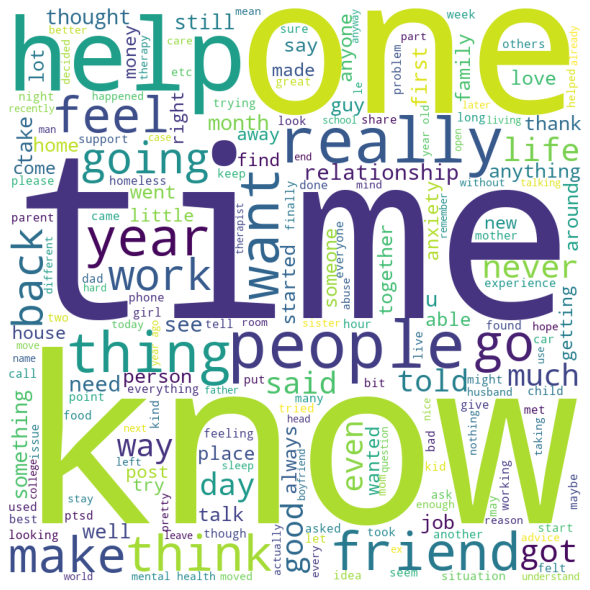

In [78]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [79]:
ys = ' '.join(stress_processed_text)

In [80]:
ys_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ys)

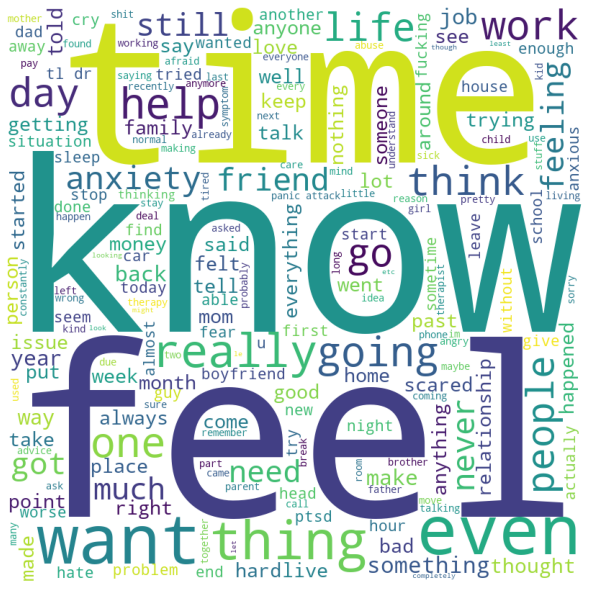

In [81]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(ys_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word2Vec

In [82]:
import gensim


In [83]:
wnl = WordNetLemmatizer()
def wv_preprocessing(text):
    
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(text, pattern)
    
    
    #step x: lower all cases and tokenize
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    
    
    #step 4: stop words
    custom_stop_words = ['r', 'url']
    stopwords_list = stopwords.words('english') + custom_stop_words
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    
    return tokens

In [84]:
wv_list_to_proc = df['text'].tolist()
wv_text_list = []

for each_row in wv_list_to_proc:
    wv_text_list.append(wv_preprocessing(each_row))

In [85]:
wv_text_list

[['said',
  'felt',
  'way',
  'suggeted',
  'go',
  'rest',
  'trigger',
  'ahead',
  'youi',
  'hypocondriac',
  'like',
  'decide',
  'look',
  'feeling',
  'doom',
  'hope',
  'maybe',
  'getting',
  'sucked',
  'rabbit',
  'hole',
  'ludicrous',
  'conspiracy',
  'stupid',
  'psychic',
  'test',
  'new',
  'age',
  'b',
  'something',
  'could',
  'even',
  'laugh',
  'road',
  'ended',
  'reading',
  'sense',
  'doom',
  'indicative',
  'various',
  'health',
  'ailment',
  'one',
  'prone',
  'top',
  'doom',
  'gloom',
  "f'n",
  'worried',
  'heart',
  'happen',
  'physical',
  'hour'],
 ['hey',
  'assistance',
  'sure',
  'right',
  'place',
  'post',
  'go',
  "i'm",
  'currently',
  'student',
  'intern',
  'sandia',
  'national',
  'lab',
  'working',
  'survey',
  'help',
  'improve',
  'marketing',
  'outreach',
  'effort',
  'many',
  'school',
  'recruit',
  'around',
  'country',
  "we're",
  'looking',
  'current',
  'undergrad',
  'grad',
  'stem',
  'student',
  's

In [86]:
w2v = gensim.models.Word2Vec(
    window = 10,
    min_count = 1,
    workers = 4
)

In [87]:
w2v.build_vocab(wv_text_list, progress_per=1000)

In [88]:
w2v.train(wv_text_list, total_examples = w2v.corpus_count, epochs=w2v.epochs)

(516373, 555340)

In [89]:
#should save model here
#model.save(saving location)

In [90]:
w2v.wv.most_similar("ptsd")

[('well', 0.9999681711196899),
 ('many', 0.9999674558639526),
 ('symptom', 0.9999668598175049),
 ('without', 0.9999668598175049),
 ('also', 0.9999661445617676),
 ('lot', 0.9999656677246094),
 ('abuse', 0.9999650120735168),
 ('fear', 0.9999647736549377),
 ('therapy', 0.9999645352363586),
 ('head', 0.9999642968177795)]

In [91]:
from gensim.models import Word2Vec
my_model = Word2Vec(wv_text_list, min_count = 2)

In [92]:
print(my_model)

Word2Vec(vocab=5549, size=100, alpha=0.025)


In [93]:
words = list(my_model.wv.vocab)

In [94]:
words

['said',
 'felt',
 'way',
 'go',
 'rest',
 'trigger',
 'ahead',
 'like',
 'decide',
 'look',
 'feeling',
 'doom',
 'hope',
 'maybe',
 'getting',
 'sucked',
 'rabbit',
 'hole',
 'stupid',
 'psychic',
 'test',
 'new',
 'age',
 'b',
 'something',
 'could',
 'even',
 'laugh',
 'road',
 'ended',
 'reading',
 'sense',
 'various',
 'health',
 'ailment',
 'one',
 'prone',
 'top',
 'worried',
 'heart',
 'happen',
 'physical',
 'hour',
 'hey',
 'assistance',
 'sure',
 'right',
 'place',
 'post',
 "i'm",
 'currently',
 'student',
 'national',
 'lab',
 'working',
 'survey',
 'help',
 'improve',
 'marketing',
 'effort',
 'many',
 'school',
 'around',
 'country',
 "we're",
 'looking',
 'current',
 'undergrad',
 'grad',
 'stem',
 'know',
 'would',
 'greatly',
 'appreciate',
 'take',
 'pas',
 'along',
 'short',
 'thank',
 'everyone',
 'entered',
 'drawing',
 'chance',
 'win',
 'three',
 'amazon',
 'mom',
 'hit',
 'newspaper',
 'shocked',
 'play',
 'hitting',
 'smacking',
 'violence',
 'sort',
 'person

## Vader

In [95]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [96]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [97]:
vader = SentimentIntensityAnalyzer()

In [98]:

for sentence in df['text']:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
 

He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours. {'neg': 0.163, 'neu': 0.722, 'pos': 0.115, 'compound': -0.6897}
Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know S

I know this may seem like a small thing, but to someone with these problems, it's a huge deal and to be at a store where you do not feel "safe" around your managers and you can't talk with them and grow as an employee, what's the point of continuing to work there? So I luckily got them to put me on 3rd shift. Minimal contact and I still get to work for the company. As I did mention, I have been struggling lately with some things: being slow with completing tasks on the work list is the biggest issue I believe. I'm not sure why I'm slow, in the past a supervisor has said "Yes you're slow, but you're thorough." {'neg': 0.092, 'neu': 0.813, 'pos': 0.094, 'compound': 0.0812}
I was consuming quite a lot of caffeine (up to 500mg per day) during the summer and I'm medicated with 18mg methylphenidate for ADHD. (I was rarely taking caffeine with methylphenidate together as there are a lot of side effects after doing that, one of them is anxiety and increased heart rate). I don't take methylphen

I know there are a lot of bad stories on here about therapy. But I was wondering about good experiences. My own experience was six weeks ago. I slipped and went on s bender, I fell into a depressive, suicidal crisis. I phoned every crisis line that exists, for ten hours, well getting drunker and drunker. {'neg': 0.295, 'neu': 0.623, 'pos': 0.083, 'compound': -0.9623}
I will stay with the sub to offer any advice I can but thought a success story was worthy to share. They say never destroy a person's hope. It may be all they have left. Much love to you all for the good tips and advice during my struggle. Thanks! {'neg': 0.038, 'neu': 0.532, 'pos': 0.43, 'compound': 0.9863}
I cant do a push up. My arms are almost useless. I need to get surgery, but my parents aren't exactly in the picture and can't support me while I take time off of work to get the surgery. Would I be able to qualify for disability to be able to support myself so that I can get surgery? if not, what kind of options do I 

She didn't go home with me, she took an Uber. It was the worst 30 minutes of my life. I payed for the food, got it to go, and went home. This is where it gets crazy. I wanted to be away from her at that time. {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.7579}
I don't know if I'm able to do that, since I didn't tell the doctor the truth to begin with. I will say that my doctor very clearly didn't believe me at my follow up appointment, but my bf was in the waiting room. So I didn't admit to anything. I was teary eyed, however. From anyone's experience- is it worth it to go to the police? {'neg': 0.032, 'neu': 0.884, 'pos': 0.084, 'compound': 0.4045}
I don't want to leave my house because I know that everyone knows what she's saying about me and EVERYONE BELIEVES IT. this was all over the fact I blocked her because she was toxic. I'm losing it, Reddit. I'm losing my mind. I can't stop crying i can't eat, all I've been thinking about is killing myself. {'neg': 0.189, 'neu': 0.7

So I decided that I am going to talk to my doctor about tapering off lexapro next week when I go in to see her. I won't lie that I'm scared, but I think it is time. The only real thing that I had while starting lexapro was restless leg and increased anxiety, but this lasted about a week. So let's hear it reddit, what is a taper really like. Oh, male and 20 mg daily for a year is my timeline with the meds. {'neg': 0.072, 'neu': 0.86, 'pos': 0.068, 'compound': 0.1753}
I have had mobility issues since I was twenty three following a difficult pregnancy that triggered inflammatory arthritis and fibromyalgia/chronic fatigue syndrome. Over the years I've had a few falls due to being very unsteady on my feet at the best of times, which have added to my mobility issues. My right ankle and calf are permanently injured, I have achilles tendonitis, plantar faciitis and the muscle in my calf has tightened so much due to the shortening of my tendons that my foot points instead of sitting normally. I

Extra: Apparently he was jailed before marrying my mom and he never told us until she found out later into the marriage. There's more into the story but I would like to know if I can file a charge on him for past incidents as well.... and I am upset that he is going to be charged for misdeamenor instead of felony. Since the victim (my mom) has enough evidences, it will be hard for him to drop the charges right? He has been avoiding the police so it took a while for the police to catch him but he paid for the bail and bailed himself out with a help of his friend. I just wished he would recieve a felony but he pleaded not guilty on the first court appearance and apparently there are more court appearances to be made befoe verdict is finalized.... {'neg': 0.162, 'neu': 0.733, 'pos': 0.105, 'compound': -0.8443}
First and foremost, I am not a veteran. I found out about PTSD service dogs from my good friend who also suffers from PTSD and is in the process of training her pup to be a service 

I have always told her that if there’s anything she wants to know, no matter how uncomfortable it may be, that I’d tell her I the truth and in return that she would do the same. I repeatedly gave warning that I didn’t think it would help and that it was a bad idea. She said she had to know and I told her that I would but she couldn’t turn it into an issue because this all happened before I even knew her. She agreed. I understand people saying that I should’ve given her space when she asked for it, but I am sorry, that is bullshit. {'neg': 0.113, 'neu': 0.835, 'pos': 0.052, 'compound': -0.742}
Hi everyone,  Sorry to ask but today is my Mum’s birthday. This is the first month in ~6 where I haven’t been paid early, so until tomorrow I have no money. The issue is it’s my mum’s birth today, and she always wants a cake, but I am unable to give her one this year. A nice cake from my local supermarket is £10, and I will be paid by work tomorrow so I can repay you soon. {'neg': 0.048, 'neu': 0.

(felt kinda awkward, but they know i dont want her any harm, but have to protect myself now) I still feel like crap for ending it right before her surgery. When she got angry she also insults me for that, that she can never forgive me that ive done this at this time. 2 minutes later she apoligizes for saying that. Shes really struggeling. {'neg': 0.254, 'neu': 0.665, 'pos': 0.08, 'compound': -0.924}
I have trouble connecting to it on a personal level, but isn't that healthy separation of past/present? I think my present anxieties/self image issues stem from traumatic experiences, but I can talk about these things fairly openly in a way that feels rehearsed. I had a panic attack where I felt terrified and unable to move at my psych's this past Tuesday, but that's not typical for me, at least not anymore? I realized most my recent "panic attacks" may be "breakdowns" because it's not accompanied by a sense of fear, but pent up emotions I haven't been able to release resulting in a sudden 

I have been always told that I was a burden, a waste of space and that I was a fuck up even tho I'm the only one in my family 2 get any qualifications nevermind getting into uni. I'll most likely end up homeless as I can't even work as I have little work experience and I try part time jobs just 2 end up having a panic attack early on which got me fired each time. My friends are all at uni doing well 2 which makes me feel worse while I'm at home being a sack of shit who stays indoors all day with no social interaction other than my parents berating me about life. I don't even know what 2 do and it's killing me. My friends constantly remark about me being a mess. {'neg': 0.21, 'neu': 0.74, 'pos': 0.05, 'compound': -0.9792}
I don't want a situation to come where she calls the police lying saying I hit her (anytime a domestic incident happens, it's automatically the guy's fault) She's called the police falsely on my dad twice, so I wouldn't put it passed her. So I'm writing this in the par

Writing is one of my methods, and I wrote this and I would really appreciate feedback or any insight on why I am not being able to withhold myself today. “I’m writing this, because I am experiencing and attempting to avoid a full blown panic attack. I am stronger then my negative thoughts, and I do have the power to control them. Writing about it makes it seem less real, and it isn’t. My dream keeps playing in my head like a record and each time i get a glimpse of the record I avoid it. {'neg': 0.129, 'neu': 0.765, 'pos': 0.106, 'compound': -0.5584}
I’m looking for advice to try to help a relative. She’s going through a very ugly divorce with her husband who’s trying to get sole custody of their three-year-old son. He’s dating a woman with a substance abuse problem and a criminal record. He met her three weeks ago and has been taking their son to sleep at her residence (unbeknownst to my relative till recently). This Monday he told her he’s filing for divorce. {'neg': 0.16, 'neu': 0.80

It was only thanks to a few friends (and a few wonderful strangers here on Reddit) that I was able to pay our electric bill, but doing so drained all of the money we had on hand, and once we used the food we had from the food bank (we can only go once a month here) we are now totally out of most things. At the moment, we can't even do laundry because we don't have the quarters, but that's a smaller problem compared to no food. If anyone wants to help, my sister and I made a wishlist that I'm including here. Any help is greatly appreciated! [Amazon <url> {'neg': 0.087, 'neu': 0.726, 'pos': 0.186, 'compound': 0.9258}
Hi Im a 19 year old kid dealing with Agoraphobia over the past year. Very boldly said, Agoraphobia is the fear of going to public places, sometimes to even leave the house. The past week, some very unpleasant things have happened in my household. I told my parents about what I've been dealing with a while back. {'neg': 0.123, 'neu': 0.834, 'pos': 0.044, 'compound': -0.6124}


It can take weeks until the problem is solved or I realise I was anxious over nothing. Recently I'm moving home due to family circumstances and it's something I didn't want to really do yet but I am having to and the place I'm moving to is lovely but I'm really anxious over it and whether I'm doing the right thing. These thoughts I'm having are causing this really dark awful feeling. Is this feeling common? I wondered if this feeling is my intuition but I don't believe it is I think it's purely anxiety. {'neg': 0.129, 'neu': 0.758, 'pos': 0.113, 'compound': -0.1839}
Hi everybody, I'm a 22 year old male who has had extreme depression and anxiety issues since I was 12 years old. I was also a competitive swimmer growing up and these issues started flaring up when I was moved into an age group with a very strict and demanding groups. 1.5 hour swimming sessions (4k yards) 6 days a week with a 30 minute dryland practice everyday or every other day, I believe. I had swam maybe one meet before

**Chapter 4** *The end of the Beginning* Drug free, Depression free, I had such a great time being homeless. Oh sure, there was the occasional scary moments, I almost died about 3 times that I can remember of. I almost got stuck in the middle of Northern Ontario  in the forest with nothing to drink, I had sex with a girl inside the engine of the Freight Train, Im not talking about the conductor's cabin, Im talking about the actual engine. {'neg': 0.119, 'neu': 0.748, 'pos': 0.133, 'compound': 0.3323}
So when Markus asked me for a date night, just the two of us, I didn't hesitate. I have loved this man so much, I think I still do. These date nights made us feel like we're young again. Everything we used to do back when we were just dumb teenagers, we're doing again now. I was so happy I could cry. {'neg': 0.085, 'neu': 0.743, 'pos': 0.172, 'compound': 0.7619}
I’m a 24 year old male. For the past month, my stomach has had little pain after eating and I’ll have problems with indigestion/s

Open to any sort of help, be it public talk in the comments, talk in dm's, an offer of transport and or shelter. Links to any other places to ask for help would be nice. Happy to talk with another social media or platform - such as fb, twitter or discord. I have looked in the side information, but none of the other linked subs look like suitable places to ask for this sort of help. I have looked at r/couchsurfing, but the problem of travel glares. {'neg': 0.055, 'neu': 0.802, 'pos': 0.144, 'compound': 0.7759}
I keep getting sudden, very short panic attacks. Or anxiety attacks. I'm not sure if I feel fear, I don't even know what the feeling is because I forget everything short term afterwards. They last a presumably short amount time and is the worst feeling imaginable to me. Some random thought I can never remember triggers it (it's definitely something that repeats though, it's a familiar feeling afterwards). {'neg': 0.263, 'neu': 0.653, 'pos': 0.084, 'compound': -0.946}
Now while yes

I didn't even realize I was doing it until I felt the coldness on the skin of my temple. I thought I would feel fear but all I felt was relief and how easy it would have been to end my overthinking, torturing anxiety brain. I was diagnosed with GAD and depression officially at 12. I have severe insomnia and crippling anxiety constantly which leaves me to overwhelming dark depression. I think about everything I've said and done and it feels like fight of flight all the time. {'neg': 0.245, 'neu': 0.659, 'pos': 0.096, 'compound': -0.9542}
Sometimes it goes into an actual panic attack, but not too often. My husband has recently banned me from going anywhere alone unless absolutely necessary (like to work). Is this something a service dog would be helpful for? Or does it have to be a lot worse than that? Sorry if it's a weird question, it's just something I've been thinking about. {'neg': 0.237, 'neu': 0.67, 'pos': 0.093, 'compound': -0.8535}
My question: how do I heal from this? As much a

They took me to a Bar and bought me a beer.. ‘Tonight you sleep here’, miming sleep and pointing at a long wooden table. So night 1 was in a bar. And so it went, I’d arrive in some village at night and just be sitting on a curb waiting for some opportunity to arise when people would retire and I could sleep rough. Almost every second night, I seemed to be engaged by some local who would take me home: to sleep in a heavenly bed, to sleep in a barn, to sleep on a floor.. whatever, I was inside and it cost my small purse nothing. {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.8591}
It's something that I continually come back to when I am thinking about my anxiety, and how it manifests. Lately, I have found some consistent stability with zoloft, and therapy. Long story short, after about half a year of being unemployed due to panic attacks at work causing me to be miserable, I am ~5 weeks back into a new job in a different field, on an SSRI, and feeling more or less great. As a res

My brother and I usually get along but for some reason, he makes me really angry, to the point that I don't like who I become. I'm a pretty level-headed guy and never really yell or get angry at anyone but for some reason **when it comes to my brother the anger I get is so overwhelming**. He's the only one that can get me to that point of anger where I start sweating and shaking. He's never "hurt" me in a major way before and all the things that annoy me are little things like ignoring me, not responding to me when I talk to his lack of eye-contact and him generally ignoring/disregarding my attempts of communication. I don't wanna be like this towards him and I don't really know what to do. {'neg': 0.218, 'neu': 0.718, 'pos': 0.064, 'compound': -0.9798}
PTSD." I'm not upset with him for having a panic attack. I sympathize. There's NO way we were going to abandon them at the restaurant if he couldn't find the car. I know that. {'neg': 0.282, 'neu': 0.668, 'pos': 0.05, 'compound': -0.876

He kept holding my arm while talking to me. He kept saying how beautiful I was. Even after he finished the exam he did another sweep with his hand idk wtf he was checking because we were all done I’m almost positive he just wanted to fucking touch me because every chance he could he would. I was so close to tears I know this isn’t like so bad, but to a girl with ptsd from assault it was the end of the world. I felt so gross and grimy having his nasty hands on me calling me beautiful. {'neg': 0.216, 'neu': 0.665, 'pos': 0.12, 'compound': -0.9361}
I have been having anxiety sense I was 16, I'm now 20. This 4 years have been difficult, lots of ups and downs, on and off medication and therapy (never really had more then just 3 appointments with the same professional ever). Then it came university and I had to move away from my family which didn't helped a lot. I had the last 6 months without anxiety but in April everything changed. I have been having anxiety attacks almost everyday, then i

However, I am resistant on it right now because I am thinking there is no point. I would rather stay here for the last few days then go because at least for now I have a place. Once I get out of here and the hospital, though, I am unsure of where to go. What should I do? I live in Washington D.C. so there seems to be a lot of facilities and help here. {'neg': 0.053, 'neu': 0.913, 'pos': 0.034, 'compound': -0.128}
Seemingly out of nowhere I have been feeling awful for about 2 - 3 weeks. I'm 22, I'm very introverted with no close friends and honestly that's how I liked it until very recently. I live with my mom but she is out of town 80% of the time so I stay home to take care of the house and our pets. When she IS in town, she goes out with her boyfriend to bars, restaurants, other fun things so I never see her. I have a boyfriend (he's 20 years old) who I love, but who does not have his drivers license yet and lives with overbearing parents so I rarely get to see him, and texting all d

(If so, how do I work on fixing that?) * Is this a lack of clear communication? (By either one party or both) * Should I try to get back in touch with them? Thank you if you made it this far. {'neg': 0.047, 'neu': 0.781, 'pos': 0.171, 'compound': 0.7219}
<url> <url> I am willing to answer any questions and show proof. * Edit, the candies are because after 20++ years he finally stopped smoking and it helps the cravings. The apple juice helps him take his medication. {'neg': 0.045, 'neu': 0.831, 'pos': 0.124, 'compound': 0.5106}
It’s resulted in me coming up with excuses to not hang out with him, which, yes, I feel bad about. Through my interactions with him, I have gotten the hint that Jack is interested in me, in a more-than-friends kind of way. I don't want to assume this as a fact—it's certainly possible that he is just trying to make a new friend. Along with many small hints that he *is* interested in me, however, the biggest hint is probably whenever I mention my boyfriend. I have 

At this point I've moved home (living with 4 younger siblings and 2 loud dogs), and I finally started a new job. I'm seeing a new psychologist and I have an appointment with a psychiatrist. My new doctor has seen me twice and already changed my diagnosis I to PTSD, which not only fits all of my symptoms, but includes some that I thought were just part of my personality. But since hearing this, I've really been struggling with accepting the reality that I have to deal with. I have vivid and disturbing nightmares, I wake up soaked in sweat, freezing and crying. {'neg': 0.124, 'neu': 0.847, 'pos': 0.029, 'compound': -0.8983}
  **tl;dr**: I've [18 F] been into my friend [18 M] for nearly two years, and he's about to go out on a date with my best friend [18 F]. I don't know how to handle my feelings about their developing romantic relationship. Also, he's trying to set me up with his best friend [19 M], and I don't know what to do about that. Thanks to anyone who may be able to offer some a

In my mind I am in control of this, I don’t feel I ‘have’ to try. I can get away. It’s like I’m using drugs to escape but I’m not on drugs I’m just dissociating to a place I want to be. I feel that if I was forced to be in reality I’d be just as angry and terrified as a drug addict in rehab. I don’t know what to do. {'neg': 0.165, 'neu': 0.781, 'pos': 0.054, 'compound': -0.9246}
Bust the stigma, don't whine but be frank, if you know or someone else that is struggling help the best you can, constantly let others know that yes they will not drown, there is a boat, and it fits way more than one person. The reality is the more you own and verbalize things, the more control you have over it and the less over you. Bottom line is busting the stigma, no one should feel like they are alone. So does my short little list work for everyone, totally not but I think it is a good reminder for people like myself..and hopefully someone else can take something away from it. If anything it's just got for

Telling me I wasn't pretty enough, my boobs weren't large enough, I wasn't thin enough, I wasn't a good girlfriend to him, I wasn't making him happy. He told me he didn't feel loved unless I was having sex with him, and only then did he feel happy. He would threaten constantly to leave, and oftentimes did as a power grab when I got "out of hand", and then would make me beg for him back. I felt so unsure of myself. I wasn't enough, and that's why he was leaving. {'neg': 0.165, 'neu': 0.77, 'pos': 0.065, 'compound': -0.8269}
Though we both had crushes on each other we weren't sure if the feelings were reciprocated. She also has some self esteem issues and told me that she wasn't ready to date someone like me three years ago when we first met, because I was "too intimidating", but instead "settled" for her ex. She dated that ex for two years, but never seemed that interested in him. She would complain about feeling like a caregiver for him (he was seriously depressed to the point where sh

(Mind you we are all here from DSS/Social Services and in this homeless motel shelter) So now it is about 10:00pm and once again he knocks on their door and tells them to turn it down and to be quiet. Nope...that's just not going to happen, as soon as he was out of earshot the cRap music and loud partying resumed. So I sit in my room perplexed as what to do about this,(wanting to get some much needed sleep) as it seems asking them to turn the music down and to quiet down was not going to happen. (obviously they're above the rules and law and don't give a shit about others in the motel) So I sat there thinking and I decided to call the owner/manager one last time and tell him PLEASE get these people to be quiet and turn the music down and to quit being so damn loud. He tells me "I have told them 2 times to turn the music down and be quiet and they won't listen to me, why don't you call the police yourself" I was floored by him saying this to me and told him it was NOT my job to enforce 

The next day after a meeting he tried confronting her about being ignored. To other people it’s nothing, however to me, I can’t stand the thought of her being assaulted or harassed in that way. I think he might be working later today when she’s working. We both discussed that she would “tell him to stop and that she has a boyfriend and if he doesn’t stop she’ll tell the manager” which I’m okay with. Except all I want to do is protect her, part of me knows that she’s going to be okay, but I need some advice about how I should address the issue if this guy doesn’t stop, keep in mind the fact that I can wrestle and basically fight, and can someone tell me something that will help me hold onto the hope? {'neg': 0.103, 'neu': 0.81, 'pos': 0.087, 'compound': -0.09}
I could try to transfer to another Olive Garden in the new area, or get a job at another restaurant. It's quite easy to get established at another restaurant. Does this sound like a good scenario? I'm currently living with a frien

I broke up with my bf of 2.5 yrs on Sunday after suspecting he was the reason why I had fallen into depression for the past year or so. I became more irritable, rude, negative and angry... which was not like my usual positive, polite, and bubbly self. He was often very negative, had anger issues/tantrums, impatient, interrupted me a lot, would ditch me for cocaine, didn't know how to drink alcohol (often consumes until he pukes), was a hypochondriac, always broke (yet had money for weed/shatter or sports betting or junk food or alcohol...), but at the same time did not look after his own health unless I pushed him to... just a lot of care-taking and issues. He has depression and anxiety as well. One of the things that really killed me inside about him was his last girlfriend who had died in a car crash about 1 year before he met me. {'neg': 0.274, 'neu': 0.7, 'pos': 0.026, 'compound': -0.9913}
Yo, straight up. I am so goddamn sick of it. Yeah, its fine, I will wake tomorrow and do the 

I have started working on a youtube series about coping with and healing PTSD using movement therapy to find flow (hooping is my outlet). I am super excited to share this with you beautiful, strong, wonderful survivors, so please share this with anyone else who you think could benefit from this series💕 Wishing you well! Until next time, may peace love and light always be with you! [Journal Entry: January 18, <url> Edit: formatting {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9918}
A nice laptop paired with a 5G hotspot from my phone and I’ll actually not be bored out of my wits end during the night. \- Get a proper set of wheels. After the end of October I’ll have to let the van sit at the shelter lot. At least I can use it for storage. I should start to look up prices for respectable used cars and insurance after I get the phone. {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.7589}
I'm not asking for a diagnosis, but I'm just curious how it went for most people who w

I was walking to a class when someone behind me at their locker dropped their stuff. I went into a panic and I started reliving the trauma. After it went away, I told my friends about it outside of class. In response, they started jokingly throwing things at the ground (including some of my stuff). I started crying in the middle of class, but no one noticed. {'neg': 0.122, 'neu': 0.85, 'pos': 0.028, 'compound': -0.705}
This means I also found it never quit heroine, but it was doing drugs behind my back. I even asked one time if it still did drugs and it lied to my face. However, it also had the audacity to question my loyalty and asked if i was hanging out with it to entertain my friends. What kind of time do you think I have... Figured out it was a covert narc abuser down to a T. {'neg': 0.111, 'neu': 0.762, 'pos': 0.127, 'compound': 0.3718}
I asked him how he's doing to fund this, if there are any bursaries and if so, how much these are, but he never gives a clear answer.   ---   **t

I won't go into too much detail but what stems off of that is thoughts of being and feeling worthless like I'm not good enough for anyone and that I'm undeserving of the good things given to me but then another thought stems off of that one which would be something along the lines of me thinking how stupid I was acting and then another thought after that and so on. Another little thing I'd like to add is that that I seriously struggle seeing my own self worth and how much I mean to my friends and family (who are all amazing by the way I love them all so much). Eventually on fairly rare occasions those thoughts tend to lead to depression, paranoia that people around me hate me and don't want anything to do with me, dissociation with reality and then finally the rock bottom of that would be thoughts of suicide (though I've never acted out on these thoughts or would ever want to) and the occasional anxiety attack where I feel nauseous, my heart beats really fast, my limbs feel like jelly,

I also used to get really bad nightmares about dying and the afterlife when I was a kid and my mom would have to rub my chest til I fell asleep. I never ever thought it was anxiety and I didnʻt want to diagnose myself because I know some people actually have it and I wouldnʻt want to compare my stress to that. Just wondering if itʻs possible that this is like mild "anxiety" or I am just sleep deprived? Also if its possible that anxiety can be come back after a decade of not having any noticeable events? Thanks ahead of time for any help. {'neg': 0.125, 'neu': 0.786, 'pos': 0.089, 'compound': -0.6655}
Hey guys, I am currently in the progress of wring a research plan for my internship. I am doing a project on the effects of scaring trials on eurasian cranes on agricultural fields. However, English is not my native language and i am having trouble coming up with a catchy head title. It has to be catchy and short but not too corny. {'neg': 0.058, 'neu': 0.913, 'pos': 0.029, 'compound': -0.

I don't think the users there are harsh from what I saw but I think the whole atmosphere they are preserving there (I think the moderators encourage it) is kinda unhelpful to be honest...and I think the moderators there are shady and harsh. I think some of the resources are good but I just mean the forum. I'm scared to post this here but I don't know where else would be good to ask so I'm taking the risk. It's just that they both seem to be such prominent forums for vulnerable people. So I just wanted to know if anyone else had similar thoughts about them? {'neg': 0.115, 'neu': 0.767, 'pos': 0.118, 'compound': 0.3506}
For the rest of the 7 years, I’ve received different forms of violent punishments. I don’t want to get into it but they involved sharp objects, attempts to drown me, paddling, etc. I was generally OK growing up, didn’t think about the abuse a lot, but friends started noticing strange behaviors and phobias that I cannot hide. Now at 30 years old I went to a therapist. I fo

But then i couldn't think straight. now i get flashbacks in school. I used to enjoy quantitative courses but now i get tension headaches from the flashbacks, and feelings of horror and hyperarousal. I just feel so violated and disturbed that it was for fear of his violence that i didn't close the door - and that he was watching me! My vagina feels tension too, which i read from a PTSD book is a common symptom. {'neg': 0.314, 'neu': 0.646, 'pos': 0.041, 'compound': -0.9845}
They would text and call constantly throughout the day begging me to forgive them for hurting me but that  they're in love and love can't be stopped. They got increasingly angry and started calling me selfish for trying to keep them apart. After I wrote a bit about the sexual abuse in an anonymous online diary my ex (who knew my username but I thought I had blocked from the site) started harassing me more. Angrily telling me that I need to stop pretending he raped me and how I wanted everything that happened and that

I know it’s terrible and selfish and obviously people can be friends with each other but I just miss having a really strong and healthy friendship with another girl the way that we did. I want to have a good weekend but it feels impossible now, and I want everyone there to have a good weekend and I don’t want to make it bad. I don’t know what to do. So I just feel like crawling into my little isolation hole and being sad by myself while knowing that everyone hates me... to be honest I don’t know why I’m overthinking it cause honestly no one would care if I did isolate myself. It’s just I want to be better, not just for other people but for myself too. {'neg': 0.149, 'neu': 0.584, 'pos': 0.267, 'compound': 0.9691}
The problem is that before I even ask for him to do this like a grown up, I have gone fully Zuko fire bender mode and decided to unleash my wrath on Joe for not doing this. Other stupid occasions I have done this? Well, did it cause when we were long distance he wouldn’t initi

Without my boyfriend who I thought was my best friend, my two female friends who used to always have my back becoming distant, and now not knowing who or what to trust seeing as Nex and I still work in the same industry my PTSD is just skyrocketing off the charts. With no roots put back down yet (which I’m working on the living sit) and no one close to turn to emotionally, how the fuck do I go on? When is enough enough? When is it too much? I know giving up is not an option but it is all so overwhelming... {'neg': 0.049, 'neu': 0.851, 'pos': 0.1, 'compound': 0.6898}
Those are all the ones I can coherently explain. I've also felt extremely lonely and I've been craving touch more than I did before I was with him. Watching movies, playing games, hanging out with friends etc all distract me for a while but when I stop all the bad feelings just come at once. Not only sadness/loneliness, but I also feel hate and rage. Does anyone have any way to help me move on? {'neg': 0.223, 'neu': 0.702, 

Hi everyone, this is my story, what I've been able to take away from it, and the feelings and the hurt that have lingered, as well as questions. Warning, this is kind of a long post, but there is a lot I need to say and just get out of my head. Trigger and Content Warnings**:** Explicit mentions of sex acts with some details,mentions of coercion, mentions of being threatened, mentions of alcoholism. Things to know about me, for the context of my life and who I am: I am 24, I am queer, my pronouns are she/her, I am trans-gender woman (please Google if you are unfamiliar with the terms), I am autistic, and as a child I was home-schooled for a very long time and lived in the middle of nowhere farm country, with no buses, sidewalks, or means of transportation. When I was 13, I had just found out my father was diagnosed with early onset dementia and I was stricken, to say the least, knowing that my already dysfunctional family was about to go through the horrors of watching my father become

My mom finally had a response, basically my brother works very hard (and he does, he does manual work, which I know is very hard) but nothing regarding me. I don't know what to do- maybe I am overreacting but I don't know.  P.s. my brother stays out of everything, he is kind and asks me questions but doesn't play games with my sister and is usually out of the room doing something.   **tl;dr**:I feel like no matter what I do - my family is disappointed at me and if I ask to not be fun of it just gets worse. {'neg': 0.154, 'neu': 0.779, 'pos': 0.066, 'compound': -0.8106}
The only woman who ever treated me with respect, my nan, died a few months ago. This household is screwing with all of us. There's nothing we can do, because she refuses to seek help, so this will never change. I want to move out, but I have nowhere to go, no job, and no money. The best I can do is wait it out until someone dies, I suppose. {'neg': 0.094, 'neu': 0.759, 'pos': 0.147, 'compound': 0.7485}
My friend is comin

With trying to pay some old bills like a delinquent 500+ electric bill, I rarely had extra to save. Paying that old bill has cleared a hurdle on my path to my own place. I paid that bill and now I can get electric service when the time comes. That was a big win for me. I stayed with a relative and kind of kept pace with expenses and contributing to expenses while slowly paying down that bill. {'neg': 0.016, 'neu': 0.856, 'pos': 0.128, 'compound': 0.8591}
Stage 4 would be perfect. I know that's self-destructive thinking; I know I'm supposed to be present, current, not wallowing in my pain and sorrow. I know I'm supposed to focus on healthy thinking and growth. I know that I'm supposed to find joy now, and I really do try. I'm not sure there's such a thing as joy absent my children; it may be a fool's errand." {'neg': 0.102, 'neu': 0.704, 'pos': 0.195, 'compound': 0.8376}
Something that's started happening to me recently is sometimes the world becomes so unreal that things like houses bl

Hi Friends! In honor of the Challenged Athletes Foundation, my dad is undertaking a great bike ride for charity and would love your support. After completing the Tour du Rouge for the American Red Cross a few years ago, he is now teaming up with the Challenged Athletes Foundation (CAF) for the Million Dollar Challenge. As a loving father, I would love to support him and his endeavor through a 620-mile ride over 7 days in California. The CAF raises money to help people with physical challenges pursue an active lifestyle through physical fitness and athletics and this is one of their biggest events. {'neg': 0.021, 'neu': 0.666, 'pos': 0.313, 'compound': 0.9895}
Hi there, I'm a 21 year old Scottish student studying contemporary art practice at an honours degree level. Is anyone interested in allowing me to use their words for use in my project for university? The consequences psychological abuse has for victims is an incredibly tricky but important subject to portray through art. I have m

But part of me fears that coming back out there I'll find a suicide. He's talked about it a lot and has plenty of guns. I had to take his Kimber .45 Raptor and Kimber .380 yesterday so I didn't have to worry about him shooting the dog. But they were just left o the counter cause I'm no thief. I just... Don't know what to do y'all.... {'neg': 0.123, 'neu': 0.793, 'pos': 0.084, 'compound': -0.6342}
I can hardly step into his room because that is where it is most concentrated. I love keeping a clean and nice smelling apartment. I don't mind doing extra cleaning and buying extra air fresheners to keep it that way. However, Matt's BO literally follows him around and lingers where ever he goes. This has cause our ENTIRE apartment to smell of testosterone and mildew in a matter of days and it's only getting worse. {'neg': 0.037, 'neu': 0.832, 'pos': 0.131, 'compound': 0.7884}
I usually "vocalize" with rocking then I end up pretty catatonic for a while then mute for another couple hours. I'm s

Years ago on this day, you did things to me I will not say. Although I might have lost a fight, nothing about that at all was right.    I hope it bothers you oh so much, to know you hurt me all by touch. Everything about you is so mean, I just wish you could get clean. I wrote this all straight from my heart, take responsibility for your part." {'neg': 0.118, 'neu': 0.713, 'pos': 0.168, 'compound': 0.6486}
I can't afford to buy new clothing, not even from goodwill. Right now, I've currently got two pairs of workout capris and that's it. And in the northeastern us it is getting colder. I could really use a couple pairs of jeans, some shirts, and a nice pair of black dress pants for interviews that I have lined up. Used is fine as long as they don't have holes in them. {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.5574}
People who need support, regardless of the elements that brought them to needing that support, are welcome here. If you are a robot or a fish person you are also

I started talking to a girl, 'J', on Tinder about a month ago. She's funny, attractive and quick-witted, however she was apprehensive to meet up for a drink to get to know each other in person straight away. We are both from the same town (we matched over Christmas) however she lives an hour and a half away in a much larger city. She first claimed that she could not afford to travel to see me even when she was back in my town (she also refused to let me pay for anything involving her, including travel to her city to meet her), however said last week that she did not want to meet me until she knew that I was genuine about her, and wanted to talk on the phone every evening for a week. If I did this, then she would meet me on the day afterwards. {'neg': 0.031, 'neu': 0.919, 'pos': 0.05, 'compound': 0.5964}
Secondly; after 3 years of countless meds and as many strains of dank as you can think of, I finally discovered my cure to anxiety. I've heard handfuls of people say music helps but tha

In [99]:
for sentence in processed_text:
    vs = vader.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

said felt way suggeted go rest trigger ahead hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloom f'n worried heart happen physical hour {'neg': 0.329, 'neu': 0.464, 'pos': 0.207, 'compound': -0.8658}
hey assistance sure right place post go i'm currently student intern sandia national lab working survey help improve marketing outreach effort many school recruit around country we're looking current undergrad grad stem student stem student know stem student would greatly appreciate help take pas along short survey thank everyone help take survey entered drawing chance win one three amazon gc {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9768}
mom hit newspaper shocked would know like play hitting smacking striking hitting violence sort person send vibe asking universe yesterday decided t

father struggling alcoholism nearly entire life contact mom sister year guess sudden caught past away heart attack recently still feel real girlfriend family nothing supportive throughout whole thing helped grieve death needle say want attend funeral memorial like remember good time bad memory rough child hood cheated mother great guy {'neg': 0.312, 'neu': 0.489, 'pos': 0.198, 'compound': -0.8219}
know lot bad story therapy wondering good experience experience six week ago slipped went bender fell depressive suicidal crisis phoned every crisis line exists ten hour well getting drunker drunker {'neg': 0.402, 'neu': 0.491, 'pos': 0.107, 'compound': -0.9413}
stay sub offer advice thought success story worthy share say never destroy person's hope may left much love good tip advice struggle thanks {'neg': 0.117, 'neu': 0.347, 'pos': 0.536, 'compound': 0.9512}
cant push arm almost useless need get surgery parent exactly picture can't support take time work get surgery would able qualify disa

every day wake nothing absolutely nothing except wasting life hoping something would happen course nothing would happen lonely fuck push away everyone life everyone else go party like tomorrow fuck cum like porno make memory even one memory book enough every day wake nothing either wasting time playing videogames watching social medium status scrolling reality absolutely nothing nothing absorbed stupid brain mine wherever hell something productive like studying reading either brain rotted size pea mental disorder degenerate brain cell yay something felt flew mar sitting dark throne rubbing pitchfork planning next move fuck literally figuratively {'neg': 0.162, 'neu': 0.636, 'pos': 0.202, 'compound': 0.2442}
late sleeping can't get husband head he's freaking weirdo feel alone situation abuse involves level anger suffering way showing affection would always love wrestle tickle torture stop screaming stop longer live even today still get little flinchy lived fear tackled pinned tickled ro

avid redditor year unfortunately karma needed post borrow would pay interest return august earlier although hopefully receiving stipend th know fact receiving scholarship fall semester first paycheck job home th added safety net case stipend take extra time process i'm willing provide lender relevant personal information private message keep contact much necessary money paid back paypal woud best i'm open option long available country thanks reading {'neg': 0.048, 'neu': 0.729, 'pos': 0.224, 'compound': 0.9325}
decided going talk doctor tapering lexapro next week go see lie i'm scared think time real thing starting lexapro restless leg increased anxiety lasted week let's hear reddit taper really like oh male mg daily year timeline med {'neg': 0.15, 'neu': 0.74, 'pos': 0.11, 'compound': -0.204}
mobility issue since twenty three following difficult pregnancy triggered inflammatory arthritis fibromyalgia chronic fatigue syndrome year i've fall due unsteady foot best time added mobility is

two month work favorite city limitless money infuriated ever done remove dissociation inexplicable rage fucking hate everything hate site even made ultimatum never come back fucking idea even {'neg': 0.374, 'neu': 0.553, 'pos': 0.072, 'compound': -0.9268}
whose fault question tree fault never bothered put effort correct hypothetical forest anyone fault could tree ever quite corrected destined live life becoming crooked fucking day done {'neg': 0.245, 'neu': 0.696, 'pos': 0.059, 'compound': -0.7301}
cognitive process feel scrambled sluggish get confused sometimes trouble filling simple form answering question phone i'm rd year major university brain feel messed know i'll able finish anyone else experience found anything help {'neg': 0.248, 'neu': 0.686, 'pos': 0.066, 'compound': -0.7506}
anyway bullshited insurance covered anyone state illegal refuse shift already talked hr head previously decided much could unless came tonight happened head hr severely worried safety so way head called

hard write attempting describe i've cut really deep spin flash pain tear deepest depression really feel kicked i'm already please forgive winded intro shaking writing style honestly taken week get point {'neg': 0.286, 'neu': 0.54, 'pos': 0.174, 'compound': -0.5859}
girlfriend major strain since last year took new job depressed mood swing half year always inverted melancholy feel new pressure pushed verge disaster tried talk responded negatively done anything help recent month said depressed need help told symptom another actually symptomatic {'neg': 0.311, 'neu': 0.593, 'pos': 0.097, 'compound': -0.8977}
abusive mother scared life started young age first time remember telling everyone scared would kill raised voice protest severely punished day lying sister relationship strained life recently opening neglect fat shaming experienced child {'neg': 0.58, 'neu': 0.42, 'pos': 0.0, 'compound': -0.9846}
essentially speaker ran people organization mayor state representative short film director

thanks friend wonderful stranger reddit able pay electric bill drained money hand used food food bank go month totally thing moment can't even laundry quarter that's smaller problem compared food anyone want help sister made wishlist i'm including help greatly appreciated amazon {'neg': 0.107, 'neu': 0.485, 'pos': 0.408, 'compound': 0.9563}
hi im year old kid dealing agoraphobia past year boldly said agoraphobia fear going public place sometimes even leave house past week unpleasant thing happened household told parent i've dealing back {'neg': 0.203, 'neu': 0.73, 'pos': 0.068, 'compound': -0.6124}
well last time fought finally call fucking scared hid basement door locked light cop took picture hand neck asked arrest told judge see picture well know got warrant show first court date know he's even trouble {'neg': 0.257, 'neu': 0.587, 'pos': 0.155, 'compound': -0.5956}
guy pull said cop way give ride get parking lot cop bugging everyone especially homeless kid skating stuff saw people g

threaten walk tried crack third stopped say rewarding really open tough well therapist though closed mouthed le personally emotional said required supervision several time matter nice fuck month progress decision going seem likely getting seems helped fair bit {'neg': 0.184, 'neu': 0.508, 'pos': 0.308, 'compound': 0.6793}
told using makeup contact stuff cry yelling yelling shoving broom face tell taking stuff bathroom shelf cleared thing mine bathroom toothbrush tooth paste nbsp live like anymore {'neg': 0.1, 'neu': 0.774, 'pos': 0.126, 'compound': -0.0516}
question worried likely guy come look cause problem future overreacting would shoe thanks {'neg': 0.275, 'neu': 0.562, 'pos': 0.163, 'compound': -0.25}
grew believing everything bad happened fault tried hard make something life hell everything feel like falling apart feel like breaking must mean truly worthless waste life feel like i'm even allowed feel like deserve hard life anyone experienced horrible burn ptsd ocd {'neg': 0.374, 

today also write emotion could think put color next word felt match emotion marker next page outline human body put color emotion feel body slightly annoyed taking seriously helping much feel like demeaning see take let know feel slow pointless appointment next week {'neg': 0.079, 'neu': 0.822, 'pos': 0.099, 'compound': 0.2398}
feel like person girlfriend since love think want sacrifice happiness want simple life find someone time grow loving family like always money grew comfortably much love family grew money important {'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'compound': 0.9779}
hey everyone i'm article mental health blog really want write people's story importance opening going seek help professional would love hear experience went started opening learned impacted life course everything write anonymous post even give pseudo name would like let know feel free comment message want private thanks {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.9583}
something think important eno

dear reddit tell today rant man voice concerned human happens male victim domestic violence men laughed taken seriously today's society seems society made mind men could victim female violence male much bigger therefore male kind agenda female punched slapped face two week ago wife lb {'neg': 0.268, 'neu': 0.585, 'pos': 0.146, 'compound': -0.7579}
complex ptsd due past romantic relationship various trauma life also diagnosed bipolar severe social general anxiety ocpd currently suffering symptom messing healthy thought pattern tearing apart current relationship terribly upset first partner really take dark side paranoid feeling thing going end made almost inevitable {'neg': 0.31, 'neu': 0.573, 'pos': 0.116, 'compound': -0.8885}
monster real abused kid recently reminded still sometimes manage find reddit thread discussion pedophilia bother see people defending pedophila often feel need respond think seemed safe way vent anger surrogate abuser think wanted chance say never chance say abus

remember lot remember little snip bit happened even remember penetration hoping still problem trying remember happened feel like remember going breakdown older starting sex intimate others noticing pattern body like rejecting partner concerned might caused abuse early age {'neg': 0.199, 'neu': 0.644, 'pos': 0.157, 'compound': -0.4767}
looking men woman year age chicago participate hour focus group market research study qualified individual receive prepaid visa card completed study link job nrc location chicago il {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
able anyone else i'm scared perfect either i'm scared people believe twist he's victim i'm bad guy although know happened wrong evidence know wrong im scared ruin life also can't bear thought anyone else anyone need detail happened share {'neg': 0.41, 'neu': 0.49, 'pos': 0.1, 'compound': -0.9545}
know kind place want ask broken bad person sticking around find peace happiness normal feel hopeless scared find love tldr got ch

qualify complete variety questionnaire online study involve four online assessment next month take min complete compensated online gift card amazon important thing know study study includes question image regarding self harm suicide unpleasant image {'neg': 0.244, 'neu': 0.615, 'pos': 0.141, 'compound': -0.7717}
constantly freaking unable see friend know diagnosis make friend feel uncomfortable feel guilty feel brought taunted father would attacked know rationally true cannot shake feeling anyone else experienced willing give advice guilt eating {'neg': 0.303, 'neu': 0.475, 'pos': 0.222, 'compound': -0.4501}
i'm getting cheap apartment utility included maintenance covered used last saving application fee hold fee i'm going moving end month going tight paying security deposit prorated rent already pay lot rent trailer month i'm selling trailer loss get third selling everything need hope another third able cover rest paycheck cut grocery bill {'neg': 0.1, 'neu': 0.809, 'pos': 0.091, 'com

issue dehydrated blood draw mental health hospital take without draw take home pump full water food cross finger could get draw morning morning bed filled counselor took emergency room see could admit local hospital absolutely refused blood drawn er told going discharge get test {'neg': 0.106, 'neu': 0.856, 'pos': 0.038, 'compound': -0.5095}
due daughter older sibling mother type craves feed enormous emotional attention realizing ended making smaller downplaying problem add burden afaik physical abuse geographical emotional abandonment mother brother probably feeling emotional abandonment smart ambitious unfortunately totally lacking self confidence habit choosing away people situation realize life undiagnosed add i've adopted myriad bad habit need address mine sake well ton structure etc need put place frame would helpful start end benefit u least exacerbate ptsd {'neg': 0.22, 'neu': 0.547, 'pos': 0.233, 'compound': -0.3906}
admitted night yes need mental assistance spending morning t

hi everyone edit title say reading symptom btw feel like give little background month ago left abusive ex girlfriend first serious partner together year half pretty much ruined life experienced kind abuse even apart including emotional mental physical fast forward today new relationship sweetest girl world brand new start since freshman college good chance never speak maybe even see ex good {'neg': 0.157, 'neu': 0.615, 'pos': 0.228, 'compound': 0.5719}
daughter recovering wife getting diagnosis pregnancy able catch snowballing control applied social security wife daughter paperwork lost system went court last week writ possession filed tomorrow morning belonging removed home asked loan co signer nobody close family willing take hit credit sought rental assistance local charity help got balance {'neg': 0.04, 'neu': 0.775, 'pos': 0.185, 'compound': 0.802}
told allowed back house court date month even certain well found friend stay another day unsure currently unemployed even license lite

response survey item anonymous kept confidential clicking survey link take page asking read consent form explaining purpose research content survey type question asked amount time may take complete survey risk benefit participation end form click agree consent use answer provide begin completing survey thank time interest {'neg': 0.038, 'neu': 0.698, 'pos': 0.265, 'compound': 0.8934}
take long time got together believe actually believe he'd lay life protect think deserve i'm sad filled much self loathing today memory literally make sick make vomit need right major surgery want erase {'neg': 0.239, 'neu': 0.662, 'pos': 0.099, 'compound': -0.7859}
participation study voluntary participant may withdraw study time without penalty study approved texas woman university institutional review board please click following link view informed consent document participate study potential risk loss confidentiality email downloading internet transaction {'neg': 0.155, 'neu': 0.691, 'pos': 0.154, 'com

summa summarum got attacked two guy without provcation nose broke even want make charge police automatically make charge since agravated assault since bone broke law really want talk much trigger one day phone ring police officer called need go police station called confrontation like {'neg': 0.214, 'neu': 0.647, 'pos': 0.139, 'compound': -0.7331}
we've much easily toughest break i've ever relationship easy get tl dr broke bf anger issue financial issue drug alcohol issue depression anxiety unresolved feeling gf died car crash year met good quality considerate loyal caring honest gentlemanly supportive make miss especially good bye text {'neg': 0.279, 'neu': 0.357, 'pos': 0.365, 'compound': 0.7574}
mom good emotional support dad sensitive touchy feely whereas take something face value pick subtlety think somewhat loveless marriage dad turned emotional outlet point early teen would spend hour talking lesson morality suffering hand insensitive clueless mom love thing romantic sensual mix

go much detail stem thought feeling worthless like i'm good enough anyone i'm undeserving good thing given another thought stem one would something along line thinking stupid acting another thought another little thing i'd like add seriously struggle seeing self worth much mean friend family amazing way love much eventually fairly rare occasion thought tend lead depression paranoia people around hate want anything dissociation reality finally rock bottom would thought suicide though i've never acted thought would ever want occasional anxiety attack feel nauseous heart beat really fast limb feel like jelly heavy breathing feel panicked want get situation quickly possible though i'm quite optimistic tend genuinely upbeat happy person i'm seeing someone problem thought i'd ask anyone extra advice could give thing start get bit control {'neg': 0.209, 'neu': 0.553, 'pos': 0.237, 'compound': 0.4589}
much can't drive impacted life way feel like personal prison therapy seem work asking overcom

always make stride others life life spite voice behind anxiety take care hope others struggling thread know going life temporary pas know lower point life making risky decision drinking drown sadness wanting take care need take responsibility making shift life make better {'neg': 0.3, 'neu': 0.502, 'pos': 0.198, 'compound': -0.6486}
we've talked said like care alot time type thing keep happening truly feel care mean neglect frustrating keep saying something i'll look like bad guy thats trying ruin friendship i'm trying going tell friend say they're probably going think i'm trying get away tl dr girlfriend trouble balancing friendship relationship {'neg': 0.209, 'neu': 0.486, 'pos': 0.306, 'compound': 0.7506}
week later found long term girlfriend entire time felt like idiot found reached last month told knew girlfriend whole time ever saw would literally break nose i'm still furious i'm angry think pulled one got away {'neg': 0.228, 'neu': 0.686, 'pos': 0.086, 'compound': -0.8126}
i've 

told needed naked wanted see sexy body said lot sexual thing took clothes naked exposed lying bed stomach head pillow flipped sat foot bed put pillow face time becomes blur giving oral sex fingering telling hot {'neg': 0.111, 'neu': 0.753, 'pos': 0.136, 'compound': 0.2732}
long story short worked call centre year vehicle breakdown service starting able cope due combination thing change management enough staff constantly expanding customer base reward based whether face fit rather actual demonstrable achievement etc unable relax work constantly thinking dreading going work get random mood swing either intensely rageful wanting burst tear headache go day time regular occurence starting manifest physical way unable sleep constantly weary lot sickness usual {'neg': 0.117, 'neu': 0.771, 'pos': 0.111, 'compound': -0.1263}
also taking zoloft mg day plan start exercising nightly minute beginning tonight want alleviate symptom cure would love know i'm patient person illness really making fed po

make made cute little note made batch favorite cooky honestly damn proud gift finished putting together looked awesome add context attended game rest family absolutely loved care actual game loved family cool atmosphere stuff well apparently dad think awesome {'neg': 0.04, 'neu': 0.383, 'pos': 0.577, 'compound': 0.9886}
work full time money i'm spending get preventing saving get place get ahead i'm i've never spot always successful good life i'm idea sure i'm expecting post venting guess {'neg': 0.121, 'neu': 0.727, 'pos': 0.151, 'compound': 0.2565}
go kind shit i'm violent suicidal hospital go really know seek help outside er dunno process set organized appointment pay got insurance however know know shit i've seen really affect point home job yet still feel disconnected normal society {'neg': 0.307, 'neu': 0.578, 'pos': 0.115, 'compound': -0.8919}
decided go party without said would cancel plan see push away act like complete asshole even though one left told want see tonight tried b

day valentine day someone sent screenshots talking girl facetime instagram saying cute flirting decided say anything girl lived another state want bring figured fried hitchhiked across country college waited till valentine day called told think live together signed month lease apartment livid brought dozen rose smashed front parking lot {'neg': 0.064, 'neu': 0.824, 'pos': 0.112, 'compound': 0.1531}
boyfriend constantly state longer relationship need constantly working towards showing want cooking cleaning house try best make sure need met even mean need fall short almost always seems like everyday argument something always turn piece shit tell made way need deal move past understand agree {'neg': 0.108, 'neu': 0.671, 'pos': 0.221, 'compound': 0.6637}
anxiety ocd terrible last week i've recently started drinking stupid know i'm feeling like need use crutch prescribed valium anti depressant find simple act drink help main issue health anxiety worst sinus headache flare ups {'neg': 0.374,

idea guess need vent well trouble started last weekend parent flew malta visit brother whose hospital bad shape initially lost use leg year ago paralysis rising waste headed hospital stayed north weekend told gf could stay home rather spend time hospital {'neg': 0.229, 'neu': 0.729, 'pos': 0.043, 'compound': -0.8481}
fucking panic attack payed done went thrift store tell mom done finally told panic attack threatened smack crap threatened could tell tone believe we're probably coming anymore said {'neg': 0.511, 'neu': 0.489, 'pos': 0.0, 'compound': -0.9681}
since knew active suicidal thought even hate wish could die right drive anymore leave know life without worse circle hell fuck fucking life money hire hitman {'neg': 0.37, 'neu': 0.374, 'pos': 0.256, 'compound': -0.7337}
would want major broadcasting film end coming k debt additional scholarship debt something really want x b could go brescia university full ride esports would even get paid go although major wanted coach said would g

terrified scared get away said joking around horrible get sting panic fear anyone pinch today can't even use lighter without fear fire fine kind lighter also panic anybody raise voice sound angry {'neg': 0.456, 'neu': 0.363, 'pos': 0.181, 'compound': -0.9444}
mother younger sister lived another city mother worked sister studied supposed stay city college mother persuaded come move change school near family concerned wanted close moved took good shift make friend thing never meant {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.7269}
one closest friend recently diagnosed stage ii hodgkin's lymphoma problem though need help paying treatment life single parent can't work anymore due disease health condition completely dire strait like others tough pay chemotherapy er visit led diagnosis contribution would help simply sharing facebook spreading word also great {'neg': 0.139, 'neu': 0.577, 'pos': 0.285, 'compound': 0.8852}
example told stubborn definitely true criticized political opin

In [100]:
processed_text[10]

'next week flying family vacation flight long msy la lax msy way home flying really trigger anxiety mostly like control surroundings idea metal tube foot air ideal also lot fear terrorist attack mass shooting movie theater crowded public place also problem wondering anyone tip flying anxiety fear'

## Word2Vec LR

In [101]:
#from kaggle
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in w2v.wv.vocab]
    return np.mean(w2v[doc], axis=0)

In [102]:
lr = LogisticRegression(C=100)

In [103]:
df['wv_text'] = [document_vector(doc) for doc in wv_text_list]


<ipython-input-101-8cf243fd6e8b>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return np.mean(w2v[doc], axis=0)


In [104]:
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555             0    2.667798  ...   
4         0.8        1539809005            24    7.554238  ...   

   lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_imagery  \
0                  1.0                 1.77000              1.52211   
1                  1.0                 1.69586              1.62045   
2                  1.0                 1.83088              1.58108   
3                  1.0                 1.75356              1.52114   
4                  1.0                 1.77644              1.64872   

   lex_dal_avg_pleasantness  social_upvote_ratio  social_num_comments  \
0                   1.89556                 0.86                    1   
1                   1.88919                 0.65                    2   
2                   1.85828                 0.67                    0   
3                   1.98848                 0.50                    5   
4                   1.81456                 1.00                    1   

   syntax_fk_grade  sentiment  \
0         3.253573  -0.002742   
1         8.828316   0.292857   
2         7.841667   0.011894   
3         4.104027   0.141671   
4         7.910952  -0.204167   

                                      processed_text  \
0  said felt way suggeted go rest trigger ahead h...   
1  hey assistance sure right place post go i'm cu...   
2  mom hit newspaper shocked would know like play...   
3  met new boyfriend amazing kind sweet good stud...   
4  october domestic violence awareness month dome...   

                                             wv_text  
0  [0.38866267, 0.5731447, 0.0054298663, -0.01465...  
1  [0.4454541, 0.6589304, 0.0045688036, -0.013792...  
2  [0.53803045, 0.79140586, 0.005847008, -0.02312...  
3  [0.5923834, 0.876323, 0.008072284, -0.01991329...  
4  [0.38339612, 0.5590712, 0.005665948, -0.020875...  

[5 rows x 118 columns]

In [105]:
wv_x_train = list(df['wv_text'])
y_train = df['label']

In [106]:
lr.fit(wv_x_train, y_train)

LogisticRegression(C=100)

In [107]:
lr.score(wv_x_train, y_train)

0.6659619450317125

In [108]:
from sklearn import svm

In [109]:

svm = svm.SVC()

In [110]:
svm.fit(X_train, y_train)

SVC()

In [111]:
svm.score(X_train, y_train)

0.966878083157153

In [112]:
svm_y_pred = svm.predict(X_test)

In [113]:
svm.score(X_test, y_test)

0.7160839160839161

In [114]:

print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       346
           1       0.71      0.76      0.73       369

    accuracy                           0.72       715
   macro avg       0.72      0.71      0.71       715
weighted avg       0.72      0.72      0.72       715

